# Trabalho Final Visualização de Informação 

### Este trabalho tem como objetivo mapear areas de pastagem e abates bovinos no Brasil 

#### Imports... 

In [80]:
import folium
from folium.features import CustomIcon
from folium.plugins import MarkerCluster
import pandas as pd
import json 
import re
import numpy as np
import base64
from folium import IFrame
import matplotlib.pyplot as plt

### Carregando os dados... 

#### Area de pastagem: numero de propriedades por intervalo de hectare 

In [36]:
estabelecimento=pd.read_excel(r'/Users/usuario02/Downloads/visualizacao/estabelecimentos.xlsx')
estabelecimento

,Unnamed: 0,Area de Pastagem (hectares),Menor que 20,Proporcao 1,P1,Entre 20 e 200,Proporcao 2,P2,Entre 200 e 1000,Proporcao 3,P3,Entre 1000 e 2500,Proporcao 4,P4,Maior que 2500,Proporcao 5,P5,Total,codigo_uf
0,Brasil,149670217.0,1236314,NaN,NaN,1110242,NaN,NaN,16870,NaN,NaN,27801,NaN,NaN,12204,NaN,NaN,2555333.0,NaN
1,Rondônia,5973261.0,16456,0.224895,11.244738,49576,0.677527,33.876346,6034,0.082463,4.123162,810,0.011070,0.553490,296,0.004045,0.202263,73172.0,11.0
2,Acre,1419137.0,3848,0.169965,8.498233,15344,0.677739,33.886926,2973,0.131316,6.565813,309,0.013648,0.682420,166,0.007332,0.366608,22640.0,12.0
3,Amazonas,1059909.0,3540,0.241572,12.078613,8882,0.606114,30.305719,1875,0.127951,6.397571,235,0.016037,0.801829,122,0.008325,0.416269,14654.0,13.0
4,Roraima,991282.0,855,0.123895,6.194754,4453,0.645269,32.263440,1160,0.168092,8.404579,302,0.043762,2.188089,131,0.018983,0.949138,6901.0,14.0
5,Pará,13628084.0,11119,0.113661,5.683049,70210,0.717703,35.885143,12851,0.131366,6.568295,2366,0.024186,1.209290,1280,0.013084,0.654223,97826.0,15.0
6,Amapá,190207.0,83,0.121168,6.058394,412,0.601460,30.072993,146,0.213139,10.656934,23,0.033577,1.678832,21,0.030657,1.532847,685.0,16.0
7,Tocantins,8033348.0,5094,0.101053,5.052669,34218,0.678807,33.940368,8454,0.167708,8.385407,1860,0.036898,1.844909,782,0.015513,0.775655,50409.0,17.0
8,Maranhao,5484081.0,34138,0.373697,18.684867,48482,0.530716,26.535817,7423,0.081257,4.062856,918,0.010049,0.502452,391,0.004280,0.214007,91352.0,21.0
9,Piauí,1580587.0,31910,0.452573,22.628638,33819,0.479648,23.982385,4096,0.058093,2.904635,463,0.006567,0.328332,220,0.003120,0.156011,70508.0,22.0


In [37]:
for i in range(1,len(estabelecimento)):
    estabelecimento['P1'][i]=int(estabelecimento['P1'][i])
    estabelecimento['P2'][i]=int(estabelecimento['P2'][i])
    estabelecimento['P3'][i]=int(estabelecimento['P3'][i])
    estabelecimento['P4'][i]=int(estabelecimento['P4'][i])
    estabelecimento['P5'][i]=int(estabelecimento['P5'][i])
    estabelecimento['codigo_uf '][i]=int(estabelecimento['codigo_uf '][i])

/Users/usuario02/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/usuario02/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/usuario02/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys

ValueError: cannot convert float NaN to integer

In [ ]:
estabelecimento

In [ ]:
abate=pd.read_excel(r'/Users/usuario02/Downloads/numero_abate.xlsx')
abate

#### Latitude e Longitude dos municipios brasileiros 

In [38]:
municipios=pd.read_csv(r'/Users/usuario02/Downloads/visualizacao/municipios.csv')
latitude=municipios['latitude']
longitude=municipios['longitude']
municipios

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
5,2300101,Abaiara,-7.34588,-39.0416,0,23
6,2900108,Abaíra,-13.24880,-41.6619,0,29
7,2900207,Abaré,-8.72073,-39.1162,0,29
8,4100103,Abatiá,-23.30490,-50.3133,0,41
9,4200051,Abdon Batista,-27.61260,-51.0233,0,42


### Construindo DataFrame com os dados apenas das capitais...

In [39]:
capital=pd.DataFrame()
capital['capital']=np.NaN
capital['lat']=np.NaN
capital['long']=np.NaN
capital['codigo uf']=np.NaN
capital_lista=[]
lat=[]
long=[]
uf=[]

for i in range(0,len(municipios)):
    if municipios['capital'][i]==1:
        capital_lista.append(municipios['nome'][i])
        lat.append(municipios['latitude'][i])
        long.append(municipios['longitude'][i])
        uf.append(municipios['codigo_uf'][i])
        
capital['capital']=capital_lista
capital['lat']=lat
capital['long']=long
capital['codigo uf']=uf

In [40]:
capital

,capital,lat,long,codigo uf
0,Aracaju,-10.909100,-37.0677,28
1,Belém,-1.455400,-48.4898,15
2,Belo Horizonte,-19.910200,-43.9266,31
3,Boa Vista,2.823840,-60.6753,14
4,Brasília,-15.779500,-47.9297,53
5,Campo Grande,-20.448600,-54.6295,50
6,Cuiabá,-15.601000,-56.0974,51
7,Curitiba,-25.419500,-49.2646,41
8,Florianópolis,-27.594500,-48.5477,42
9,Fortaleza,-3.716640,-38.5423,23


### Segmentando os dados por municipio para depois simular as proporções 

In [41]:
municipios_RO=pd.DataFrame()
nome=[]
latitude=[]
longitude=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==11: 
        nome.append(municipios['nome'][i])
        latitude.append(municipios['latitude'][i])
        longitude.append(municipios['longitude'][i])

municipios_RO['Municipios RO']=nome
municipios_RO['lat']=latitude
municipios_RO['long']=longitude


In [42]:
municipios_AC=pd.DataFrame()
nome1=[]
latitude1=[]
longitude1=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==12: 
        nome1.append(municipios['nome'][i])
        latitude1.append(municipios['latitude'][i])
        longitude1.append(municipios['longitude'][i])

municipios_AC['Municipios AC']=nome1
municipios_AC['lat']=latitude1
municipios_AC['long']=longitude1

In [43]:
municipios_AM=pd.DataFrame()
nome2=[]
latitude2=[]
longitude2=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==13: 
        nome2.append(municipios['nome'][i])
        latitude2.append(municipios['latitude'][i])
        longitude2.append(municipios['longitude'][i])

municipios_AM['Municipios AM']=nome2
municipios_AM['lat']=latitude2
municipios_AM['long']=longitude2

In [44]:
municipios_RR=pd.DataFrame()
nome3=[]
latitude3=[]
longitude3=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==14: 
        nome3.append(municipios['nome'][i])
        latitude3.append(municipios['latitude'][i])
        longitude3.append(municipios['longitude'][i])

municipios_RR['Municipios RR']=nome3
municipios_RR['lat']=latitude3
municipios_RR['long']=longitude3

In [45]:
municipios_PA=pd.DataFrame()
nome4=[]
latitude4=[]
longitude4=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==15: 
        nome4.append(municipios['nome'][i])
        latitude4.append(municipios['latitude'][i])
        longitude4.append(municipios['longitude'][i])

municipios_PA['Municipios PA']=nome4
municipios_PA['lat']=latitude4
municipios_PA['long']=longitude4

In [46]:
municipios_AP=pd.DataFrame()
nome5=[]
latitude5=[]
longitude5=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==16: 
        nome5.append(municipios['nome'][i])
        latitude5.append(municipios['latitude'][i])
        longitude5.append(municipios['longitude'][i])

municipios_AP['Municipios PA']=nome5
municipios_AP['lat']=latitude5
municipios_AP['long']=longitude5

In [47]:
municipios_TO=pd.DataFrame()
nome6=[]
latitude6=[]
longitude6=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==17: 
        nome6.append(municipios['nome'][i])
        latitude6.append(municipios['latitude'][i])
        longitude6.append(municipios['longitude'][i])

municipios_TO['Municipios TO']=nome6
municipios_TO['lat']=latitude6
municipios_TO['long']=longitude6

In [48]:
municipios_MA=pd.DataFrame()
nome7=[]
latitude7=[]
longitude7=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==21: 
        nome7.append(municipios['nome'][i])
        latitude7.append(municipios['latitude'][i])
        longitude7.append(municipios['longitude'][i])

municipios_MA['Municipios MA']=nome7
municipios_MA['lat']=latitude7
municipios_MA['long']=longitude7

In [49]:
municipios_PI=pd.DataFrame()
nome8=[]
latitude8=[]
longitude8=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==22: 
        nome8.append(municipios['nome'][i])
        latitude8.append(municipios['latitude'][i])
        longitude8.append(municipios['longitude'][i])

municipios_PI['Municipios PI']=nome8
municipios_PI['lat']=latitude8
municipios_PI['long']=longitude8

In [50]:
municipios_CE=pd.DataFrame()
nome9=[]
latitude9=[]
longitude9=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==23: 
        nome9.append(municipios['nome'][i])
        latitude9.append(municipios['latitude'][i])
        longitude9.append(municipios['longitude'][i])

municipios_CE['Municipios CE']=nome9
municipios_CE['lat']=latitude9
municipios_CE['long']=longitude9

In [51]:
municipios_RN=pd.DataFrame()
nome10=[]
latitude10=[]
longitude10=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==24: 
        nome10.append(municipios['nome'][i])
        latitude10.append(municipios['latitude'][i])
        longitude10.append(municipios['longitude'][i])

municipios_RN['Municipios RN']=nome10
municipios_RN['lat']=latitude10
municipios_RN['long']=longitude10

In [52]:
municipios_PB=pd.DataFrame()
nome11=[]
latitude11=[]
longitude11=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==25: 
        nome11.append(municipios['nome'][i])
        latitude11.append(municipios['latitude'][i])
        longitude11.append(municipios['longitude'][i])

municipios_PB['Municipios PB']=nome11
municipios_PB['lat']=latitude11
municipios_PB['long']=longitude11

In [53]:
municipios_PE=pd.DataFrame()
nome12=[]
latitude12=[]
longitude12=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==26: 
        nome12.append(municipios['nome'][i])
        latitude12.append(municipios['latitude'][i])
        longitude12.append(municipios['longitude'][i])

municipios_PE['Municipios PE']=nome12
municipios_PE['lat']=latitude12
municipios_PE['long']=longitude12

In [54]:
municipios_AL=pd.DataFrame()
nome13=[]
latitude13=[]
longitude13=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==27: 
        nome11.append(municipios['nome'][i])
        latitude13.append(municipios['latitude'][i])
        longitude13.append(municipios['longitude'][i])

municipios_AL['Municipios AL']=nome13
municipios_AL['lat']=latitude13
municipios_AL['long']=longitude13

In [55]:
municipios_SE=pd.DataFrame()
nome14=[]
latitude14=[]
longitude14=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==28: 
        nome14.append(municipios['nome'][i])
        latitude14.append(municipios['latitude'][i])
        longitude14.append(municipios['longitude'][i])

municipios_SE['Municipios SE']=nome14
municipios_SE['lat']=latitude14
municipios_SE['long']=longitude14

In [56]:
municipios_BA=pd.DataFrame()
nome15=[]
latitude15=[]
longitude15=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==29: 
        nome15.append(municipios['nome'][i])
        latitude15.append(municipios['latitude'][i])
        longitude15.append(municipios['longitude'][i])

municipios_BA['Municipios BA']=nome15
municipios_BA['lat']=latitude15
municipios_BA['long']=longitude15

In [57]:
municipios_MG=pd.DataFrame()
nome16=[]
latitude16=[]
longitude16=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==31: 
        nome16.append(municipios['nome'][i])
        latitude16.append(municipios['latitude'][i])
        longitude16.append(municipios['longitude'][i])

municipios_MG['Municipios MG']=nome16
municipios_MG['lat']=latitude16
municipios_MG['long']=longitude16

In [58]:
municipios_ES=pd.DataFrame()
nome17=[]
latitude17=[]
longitude17=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==32: 
        nome17.append(municipios['nome'][i])
        latitude17.append(municipios['latitude'][i])
        longitude17.append(municipios['longitude'][i])

municipios_ES['Municipios ES']=nome17
municipios_ES['lat']=latitude17
municipios_ES['long']=longitude17

In [59]:
municipios_RJ=pd.DataFrame()
nome18=[]
latitude18=[]
longitude18=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==33: 
        nome18.append(municipios['nome'][i])
        latitude18.append(municipios['latitude'][i])
        longitude18.append(municipios['longitude'][i])

municipios_RJ['Municipios RJ']=nome18
municipios_RJ['lat']=latitude18
municipios_RJ['long']=longitude18

In [60]:
municipios_SP=pd.DataFrame()
nome19=[]
latitude19=[]
longitude19=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==35: 
        nome19.append(municipios['nome'][i])
        latitude19.append(municipios['latitude'][i])
        longitude19.append(municipios['longitude'][i])

municipios_SP['Municipios SP']=nome19
municipios_SP['lat']=latitude19
municipios_SP['long']=longitude19

In [61]:
municipios_PR=pd.DataFrame()
nome20=[]
latitude20=[]
longitude20=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==41: 
        nome20.append(municipios['nome'][i])
        latitude20.append(municipios['latitude'][i])
        longitude20.append(municipios['longitude'][i])

municipios_PR['Municipios PR']=nome20
municipios_PR['lat']=latitude20
municipios_PR['long']=longitude20

In [62]:
municipios_SC=pd.DataFrame()
nome21=[]
latitude21=[]
longitude21=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==42: 
        nome21.append(municipios['nome'][i])
        latitude21.append(municipios['latitude'][i])
        longitude21.append(municipios['longitude'][i])

municipios_SC['Municipios SC']=nome21
municipios_SC['lat']=latitude21
municipios_SC['long']=longitude21

In [63]:
municipios_RS=pd.DataFrame()
nome22=[]
latitude22=[]
longitude22=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==43: 
        nome22.append(municipios['nome'][i])
        latitude22.append(municipios['latitude'][i])
        longitude22.append(municipios['longitude'][i])

municipios_RS['Municipios RS']=nome22
municipios_RS['lat']=latitude22
municipios_RS['long']=longitude22

In [64]:
municipios_MS=pd.DataFrame()
nome23=[]
latitude23=[]
longitude23=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==50: 
        nome23.append(municipios['nome'][i])
        latitude23.append(municipios['latitude'][i])
        longitude23.append(municipios['longitude'][i])

municipios_MS['Municipios MS']=nome23
municipios_MS['lat']=latitude23
municipios_MS['long']=longitude23

In [65]:
municipios_MT=pd.DataFrame()
nome24=[]
latitude24=[]
longitude24=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==51: 
        nome24.append(municipios['nome'][i])
        latitude24.append(municipios['latitude'][i])
        longitude24.append(municipios['longitude'][i])

municipios_MT['Municipios MT']=nome24
municipios_MT['lat']=latitude24
municipios_MT['long']=longitude24

In [66]:
municipios_GO_DF=pd.DataFrame()
nome25=[]
latitude25=[]
longitude25=[]

for i in range(0,len(municipios)):
    if municipios['codigo_uf'][i]==52 or municipios['codigo_uf'][i]==53: 
        nome25.append(municipios['nome'][i])
        latitude25.append(municipios['latitude'][i])
        longitude25.append(municipios['longitude'][i])

municipios_GO_DF['Municipios GO + DF']=nome25
municipios_GO_DF['lat']=latitude25
municipios_GO_DF['long']=longitude25

In [67]:
mun_lat=[municipios_SE['lat'][0],municipios_PA['lat'][0],municipios_MG['lat'][0],municipios_RR['lat'][0],
         municipios_GO_DF['lat'][0],municipios_MS['lat'][0],municipios_MT['lat'][0],municipios_PR['lat'][0],
         municipios_SC['lat'][0],municipios_CE['lat'][0],municipios_GO_DF['lat'][1],municipios_PB['lat'][1],
         municipios_AP['lat'][0],municipios_AL['lat'][0],municipios_AM['lat'][0],municipios_RN['lat'][0],
         municipios_TO['lat'][0],municipios_RS['lat'][0],municipios_RO['lat'][0],municipios_PE['lat'][0],
         municipios_AC['lat'][0],municipios_RJ['lat'][0],municipios_BA['lat'][0],municipios_MA['lat'][0],
         municipios_SP['lat'][0],municipios_PI['lat'][0],municipios_ES['lat'][0]]
mun_long=[municipios_SE['long'][0],municipios_PA['long'][0],municipios_MG['long'][0],municipios_RR['long'][0],
         municipios_GO_DF['long'][0],municipios_MS['long'][0],municipios_MT['long'][0],municipios_PR['long'][0],
         municipios_SC['long'][0],municipios_CE['long'][0],municipios_GO_DF['long'][1],municipios_PB['long'][1],
         municipios_AP['long'][0],municipios_AL['long'][0],municipios_AM['long'][0],municipios_RN['long'][0],
         municipios_TO['long'][0],municipios_RS['long'][0],municipios_RO['long'][0],municipios_PE['long'][0],
         municipios_AC['long'][0],municipios_RJ['long'][0],municipios_BA['long'][0],municipios_MA['long'][0],
         municipios_PI['long'][0],municipios_SP['lat'][0],municipios_ES['long'][0]]

In [68]:
capital['lat1']=mun_lat
capital['long1']=mun_long

## Dados de lat e long para delimitar os estados 

In [69]:
file=r'/Users/usuario02/Downloads/visualizacao/br_states.json'
br_estados =file
geo_json_data = json.load(open(br_estados))



In [46]:
estabelecimento

,Unnamed: 0,Area de Pastagem (hectares),Menor que 20,Proporcao 1,P1,Entre 20 e 200,Proporcao 2,P2,Entre 200 e 1000,Proporcao 3,P3,Entre 1000 e 2500,Proporcao 4,P4,Maior que 2500,Proporcao 5,P5,Total,codigo_uf
0,Brasil,149670217,1236314,NaN,NaN,1110242,NaN,NaN,16870,NaN,NaN,27801,NaN,NaN,12204,NaN,NaN,2555333,NaN
1,Rondônia,5973261,16456,0.224895,11.0,49576,0.677527,33.0,6034,0.082463,4.0,810,0.011070,0.0,296,0.004045,0.0,73172,11.0
2,Acre,1419137,3848,0.169965,8.0,15344,0.677739,33.0,2973,0.131316,6.0,309,0.013648,0.0,166,0.007332,0.0,22640,12.0
3,Amazonas,1059909,3540,0.241572,12.0,8882,0.606114,30.0,1875,0.127951,6.0,235,0.016037,0.0,122,0.008325,0.0,14654,13.0
4,Roraima,991282,855,0.123895,6.0,4453,0.645269,32.0,1160,0.168092,8.0,302,0.043762,2.0,131,0.018983,0.0,6901,14.0
5,Pará,13628084,11119,0.113661,5.0,70210,0.717703,35.0,12851,0.131366,6.0,2366,0.024186,1.0,1280,0.013084,0.0,97826,15.0
6,Amapá,190207,83,0.121168,6.0,412,0.601460,30.0,146,0.213139,10.0,23,0.033577,1.0,21,0.030657,1.0,685,16.0
7,Tocantins,8033348,5094,0.101053,5.0,34218,0.678807,33.0,8454,0.167708,8.0,1860,0.036898,1.0,782,0.015513,0.0,50409,17.0
8,Maranhao,5484081,34138,0.373697,18.0,48482,0.530716,26.0,7423,0.081257,4.0,918,0.010049,0.0,391,0.004280,0.0,91352,21.0
9,Piauí,1580587,31910,0.452573,22.0,33819,0.479648,23.0,4096,0.058093,2.0,463,0.006567,0.0,220,0.003120,0.0,70508,22.0


In [47]:
estabelecimento.iloc[26,16]

0.0

## Construindo os gráficos de area de pastagem a partir dos dados do DataFrame 

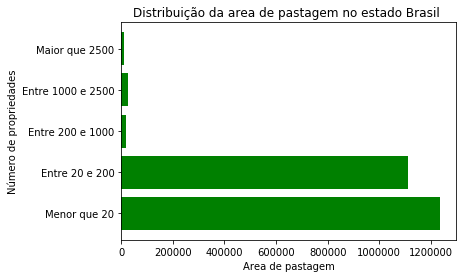

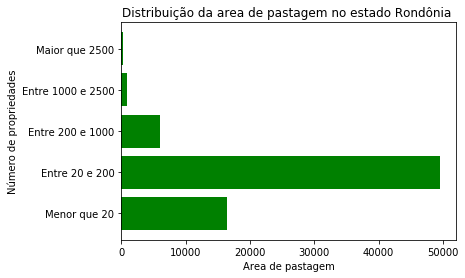

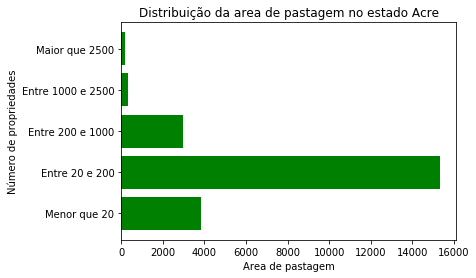

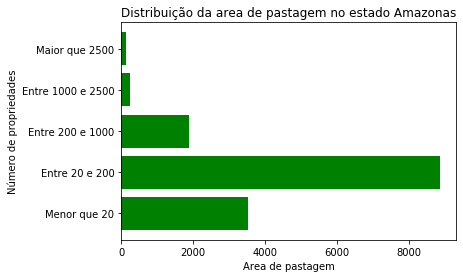

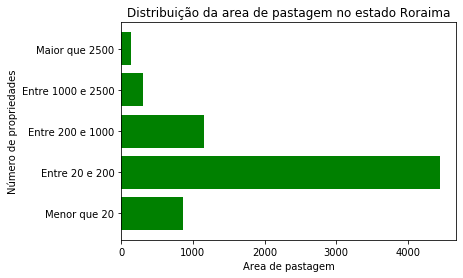

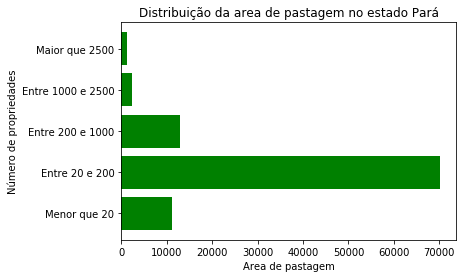

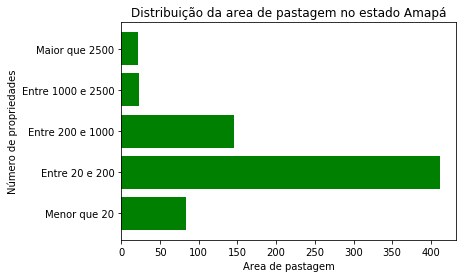

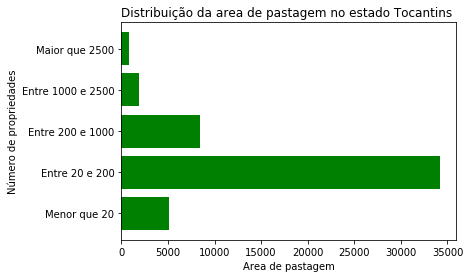

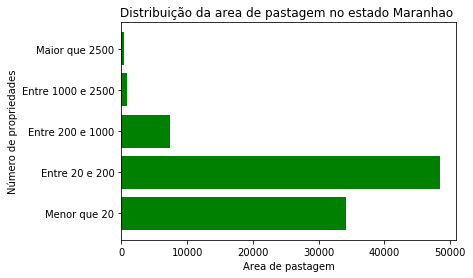

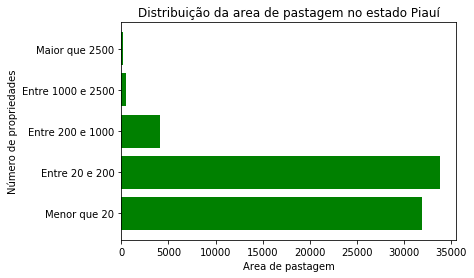

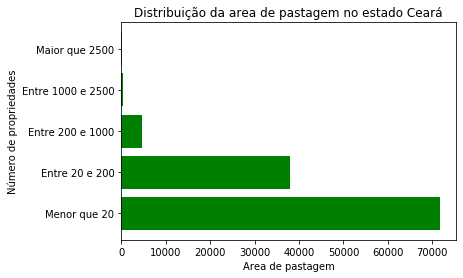

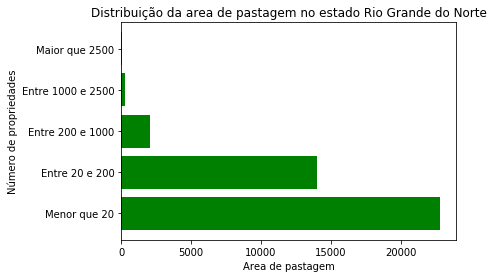

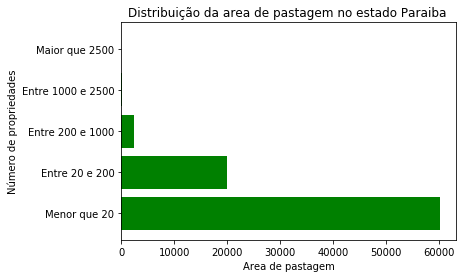

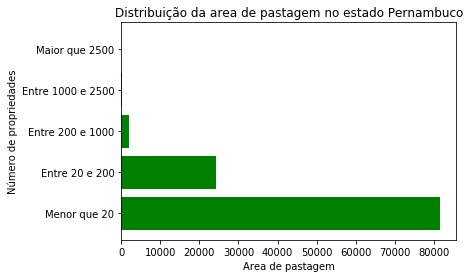

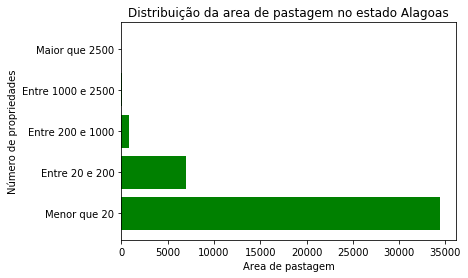

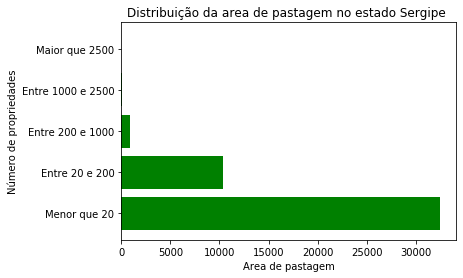

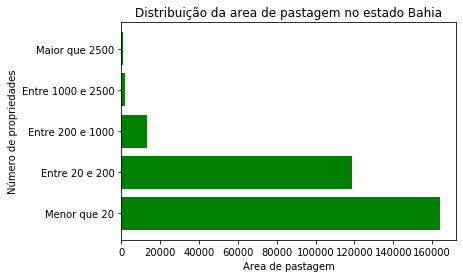

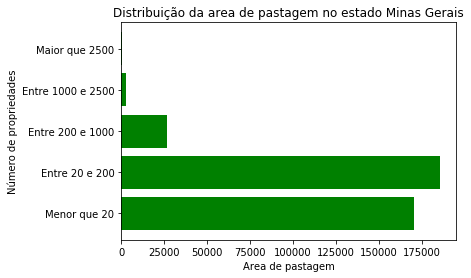

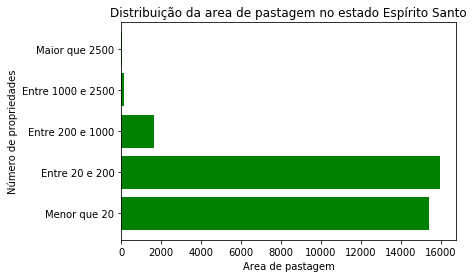

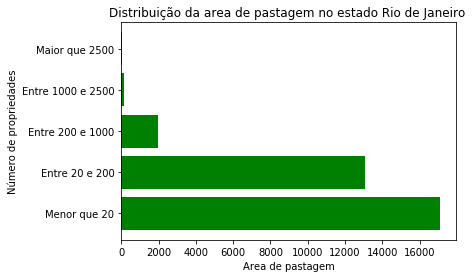

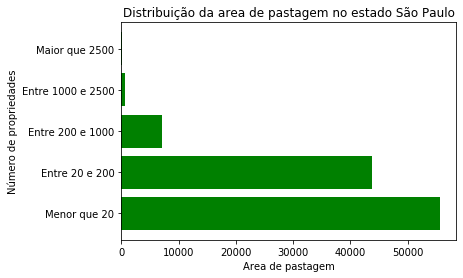

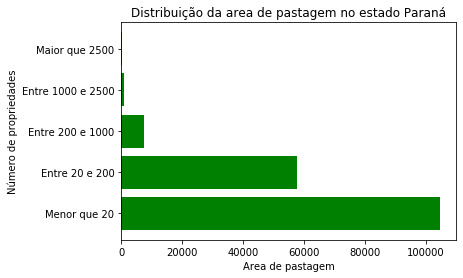

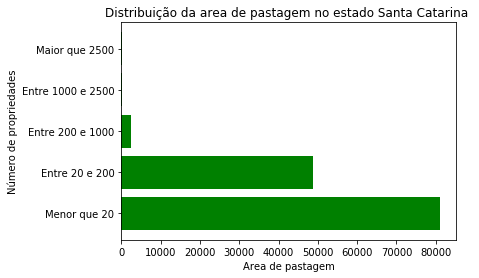

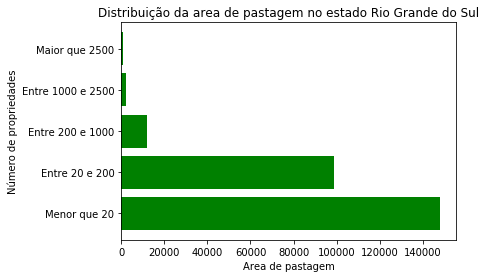

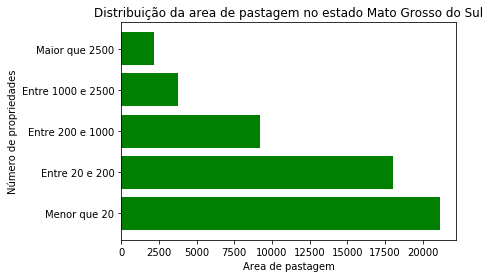

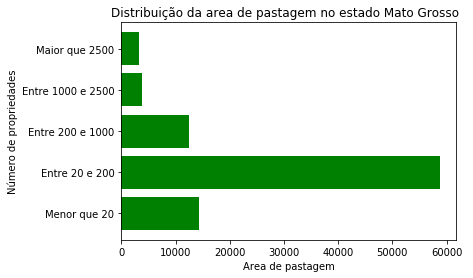

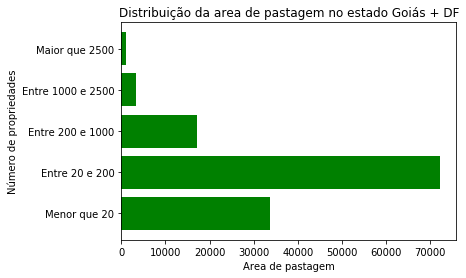

In [121]:
import matplotlib.pyplot as plt

for i in range(0,len(estabelecimento)):

    intervalos=['Menor que 20','Entre 20 e 200','Entre 200 e 1000','Entre 1000 e 2500','Maior que 2500']    
    quantidade=[estabelecimento['Menor que 20'][i],estabelecimento['Entre 20 e 200'][i],
            estabelecimento['Entre 200 e 1000'][i],estabelecimento['Entre 1000 e 2500'][i],
            estabelecimento['Maior que 2500'][i]]
    
    plt.barh(intervalos,quantidade,color='green')

    plt.ylabel('Número de propriedades')
    plt.xlabel('Area de pastagem')
    plt.title('Distribuição da area de pastagem no estado {}'.format(estabelecimento['Unnamed: 0'][i]))
    plt.savefig('Pastagem_{}.jpg'.format(estabelecimento['codigo_uf '][i]),dpi=100)
    
    plt.show()

In [78]:
raw_data = {'intervalos': ['<20','[20,200]','[200,1000]','[1000,2500]','[>2500]'],
            
            
        'estado': [estabelecimento['Menor que 20'][1],estabelecimento['Entre 20 e 200'][1],
                  estabelecimento['Entre 200 e 1000'][1],estabelecimento['Entre 1000 e 2500'][1],
                  estabelecimento['Maior que 2500'][1]],
        'total': [estabelecimento['Menor que 20'][27],estabelecimento['Entre 20 e 200'][27],
                  estabelecimento['Entre 200 e 1000'][27],estabelecimento['Entre 1000 e 2500'][27],
                  estabelecimento['Maior que 2500'][27]]}

df = pd.DataFrame(raw_data, columns = ['intervalos','estado','total'])
df


,intervalos,estado,total
0,<20,16456,1236314
1,"[20,200]",49576,1110242
2,"[200,1000]",6034,168770
3,"[1000,2500]",810,27801
4,[>2500],296,12204


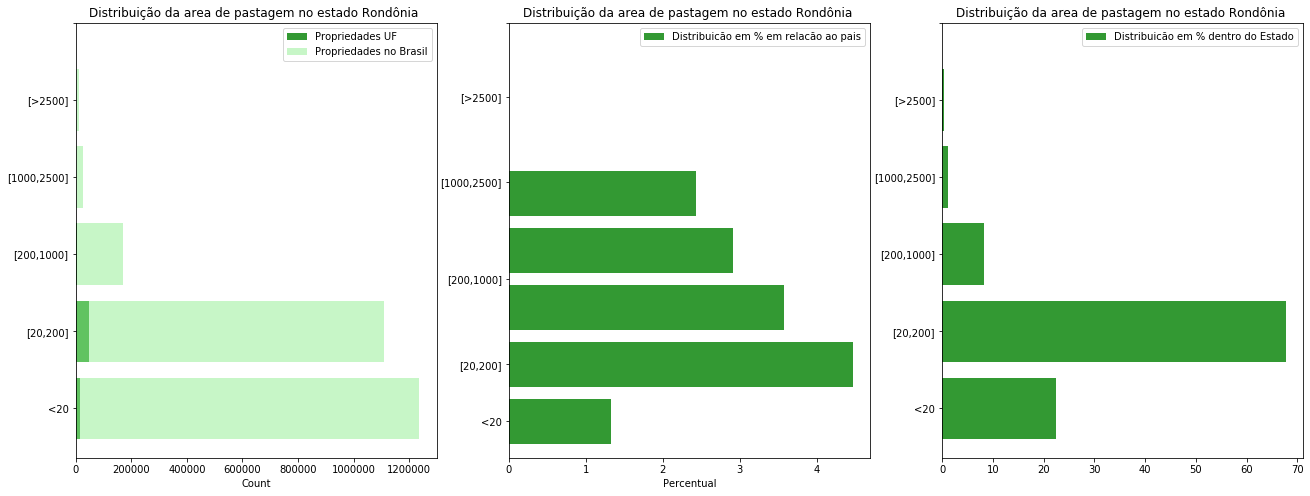

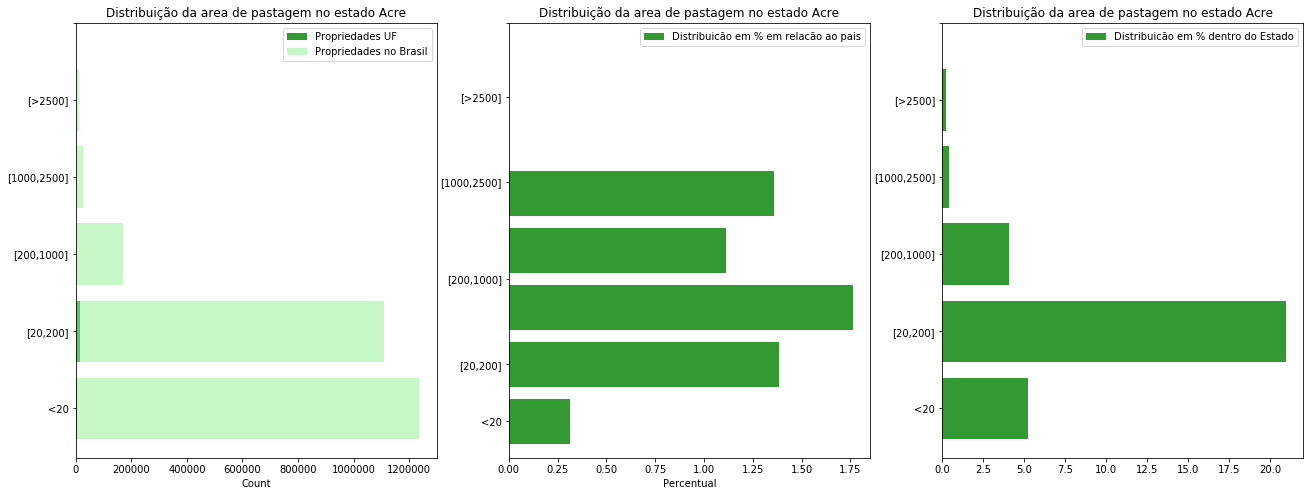

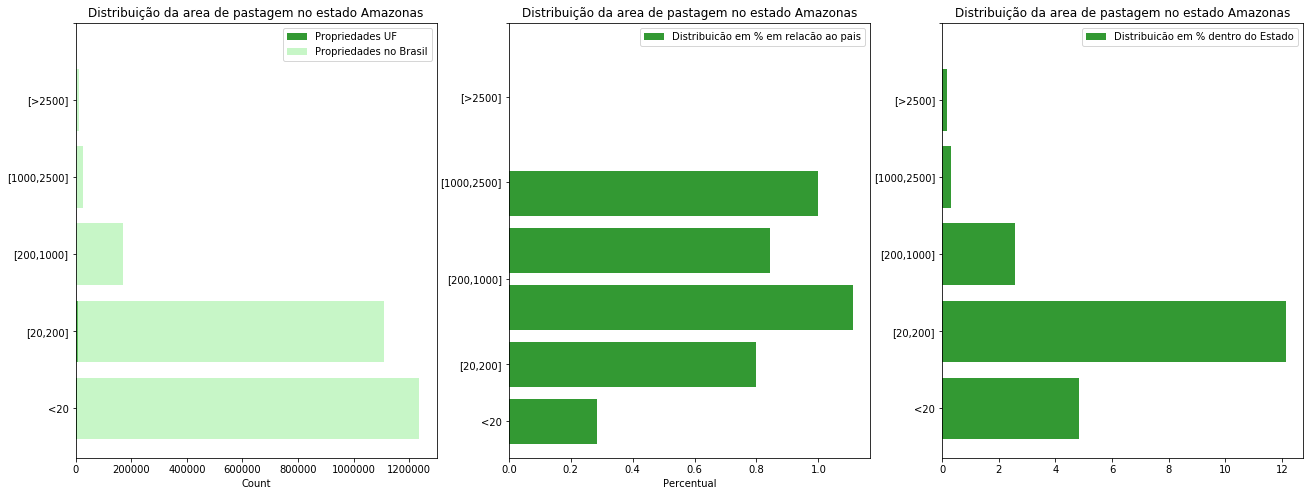

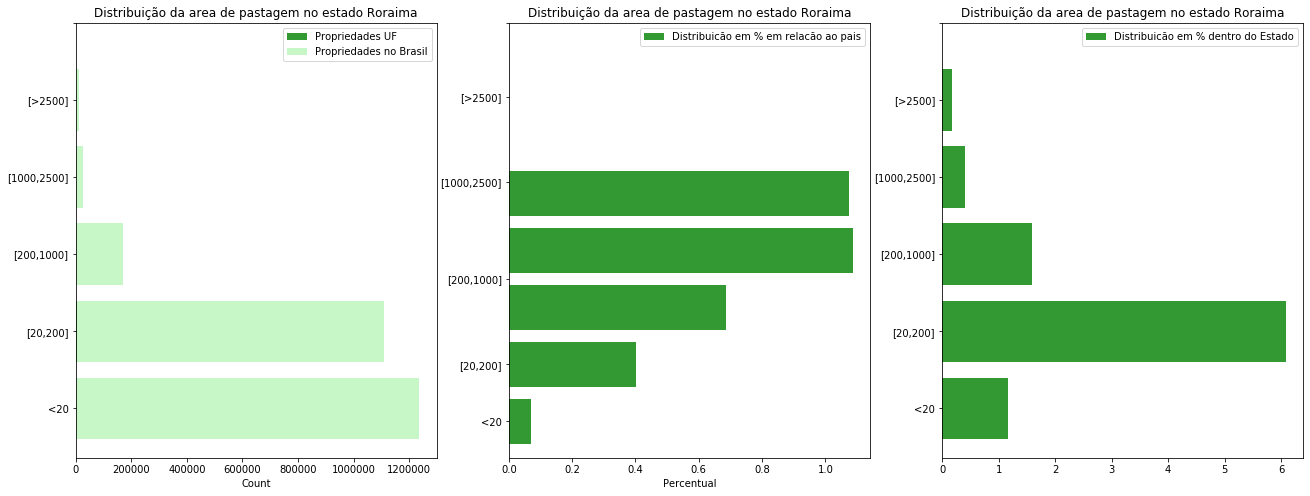

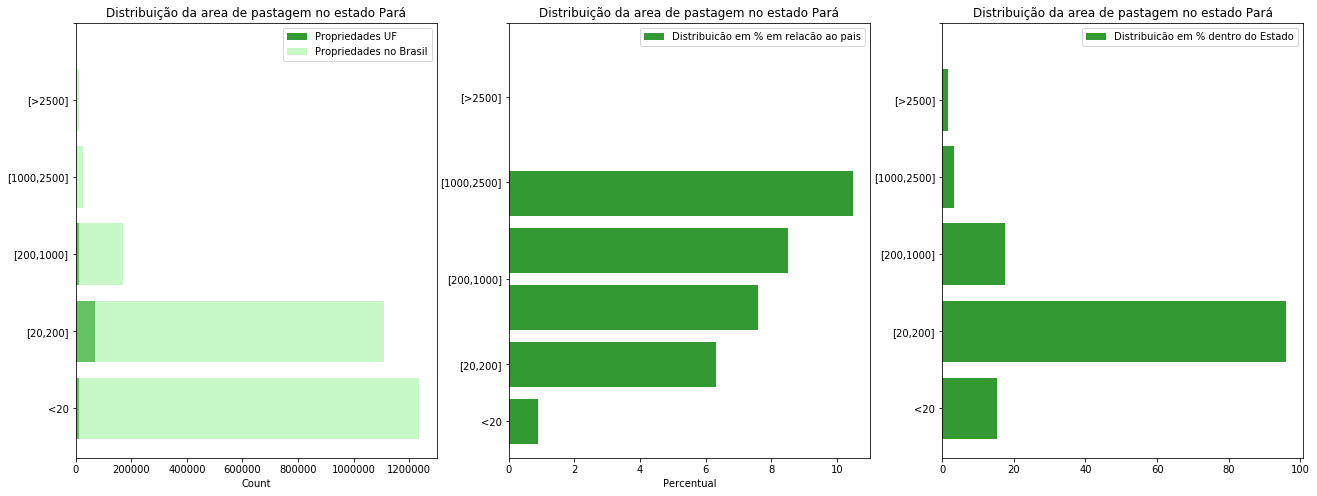

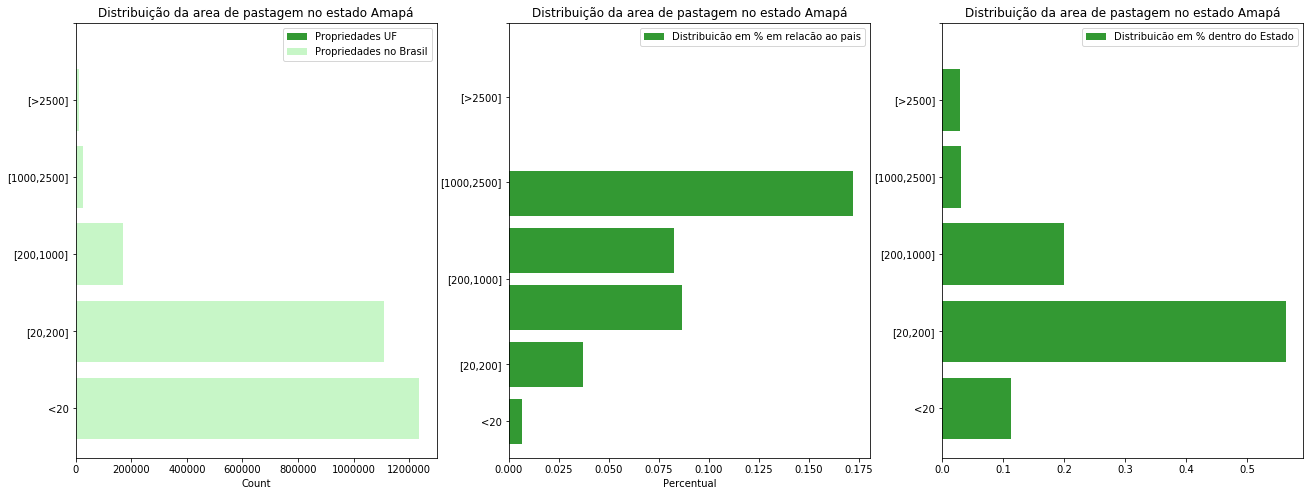

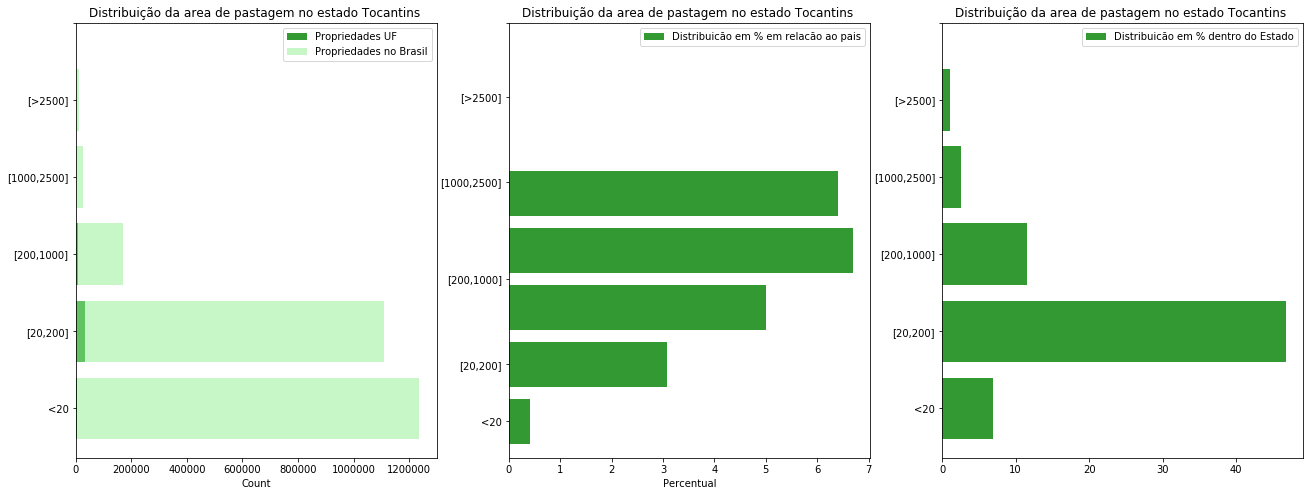

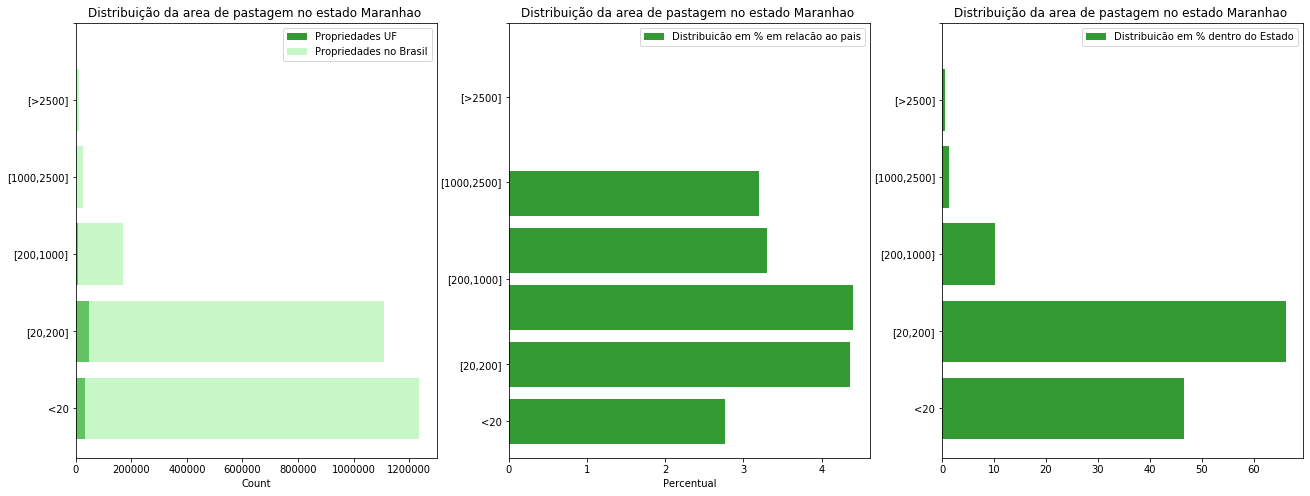

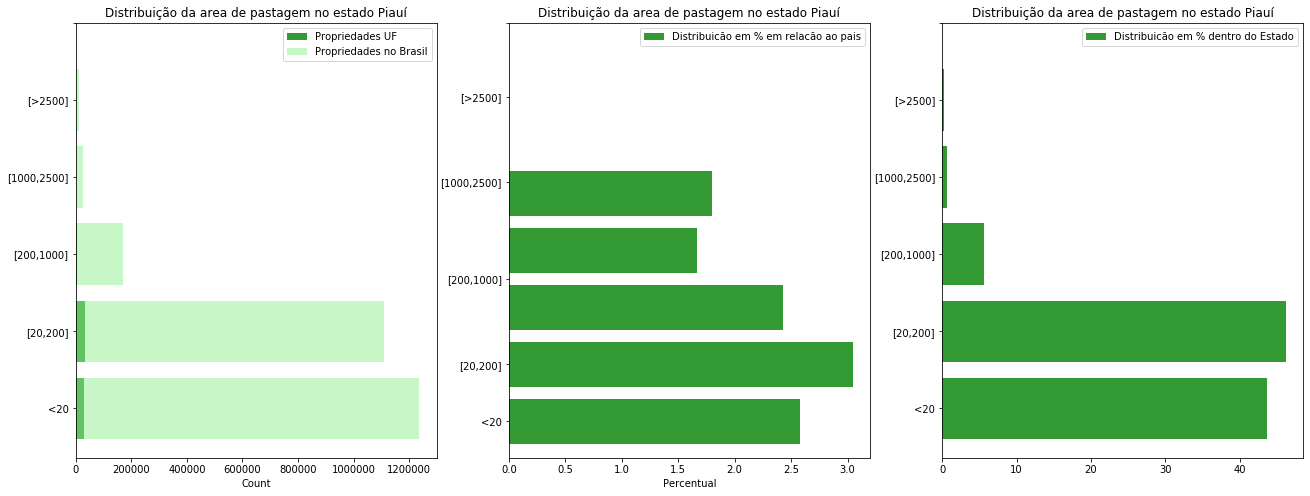

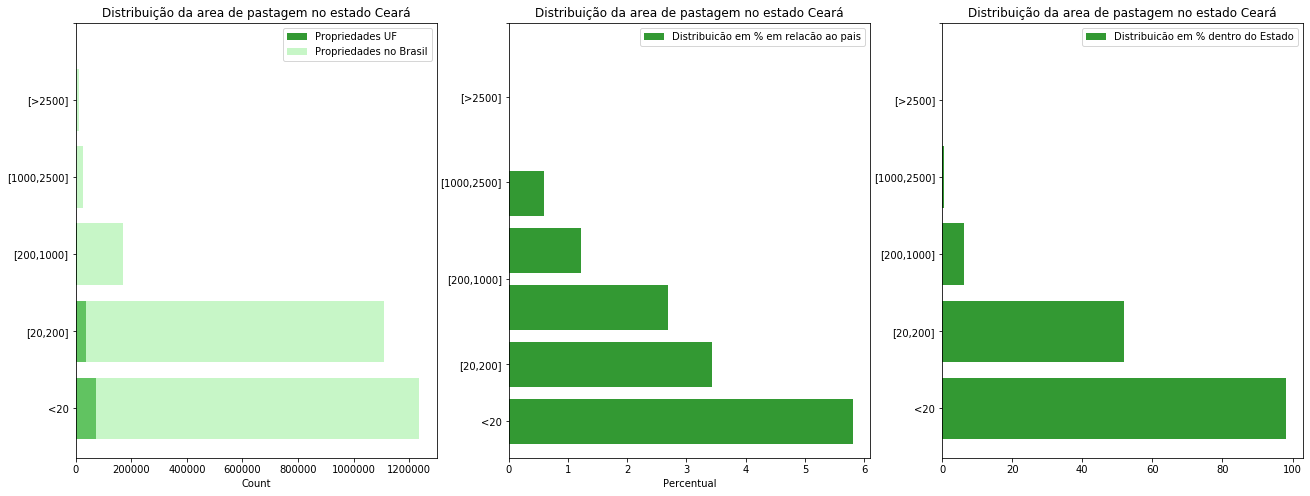

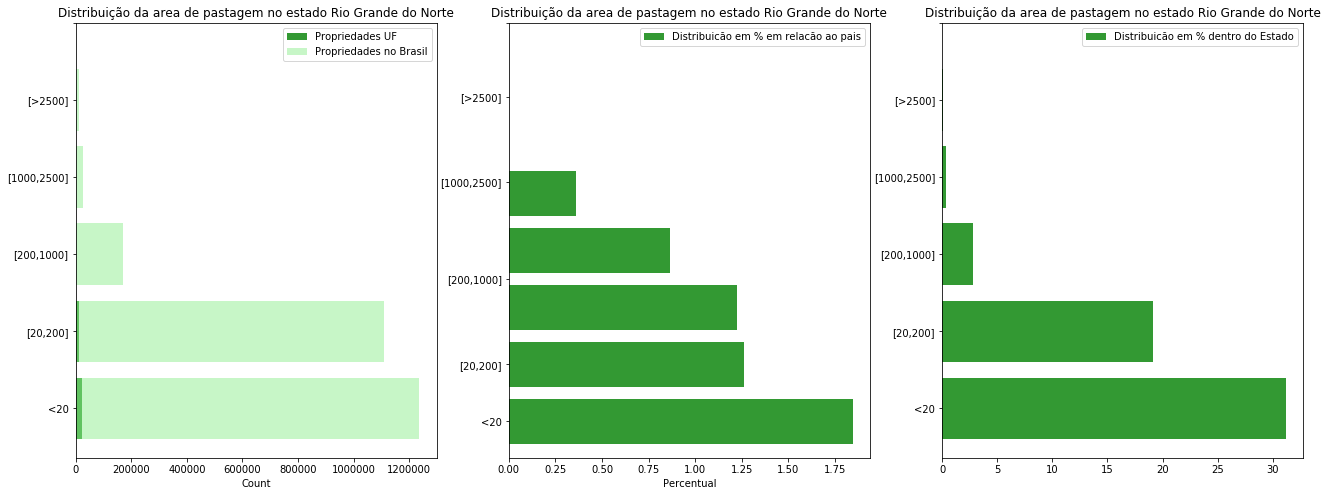

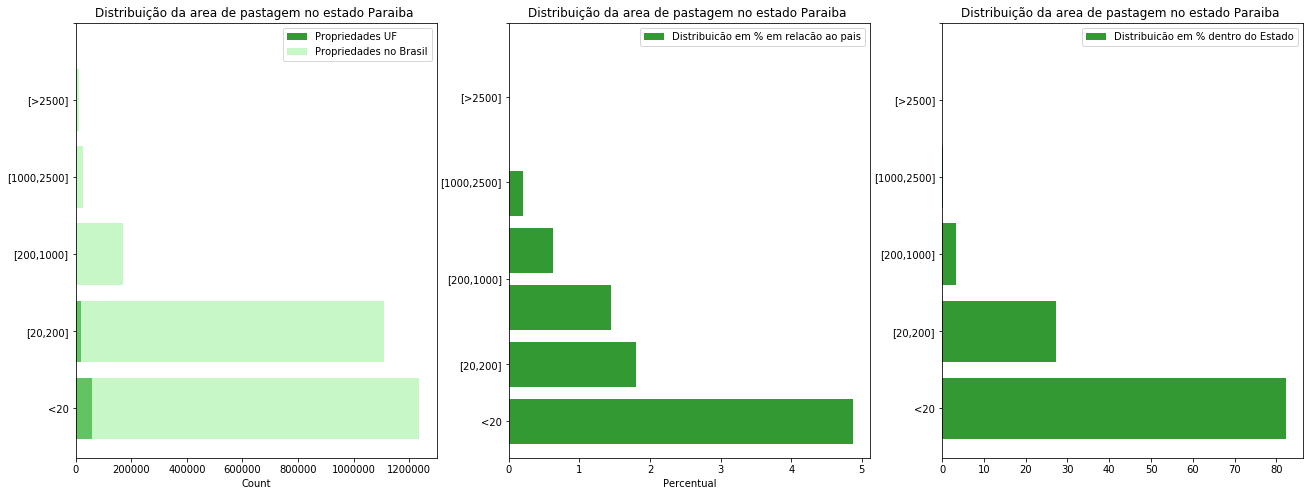

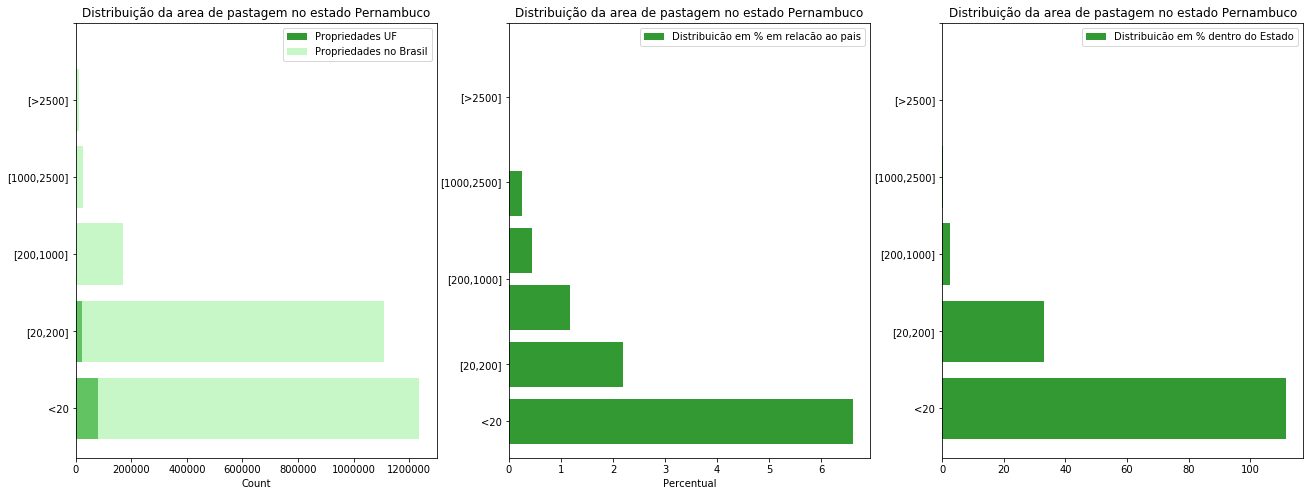

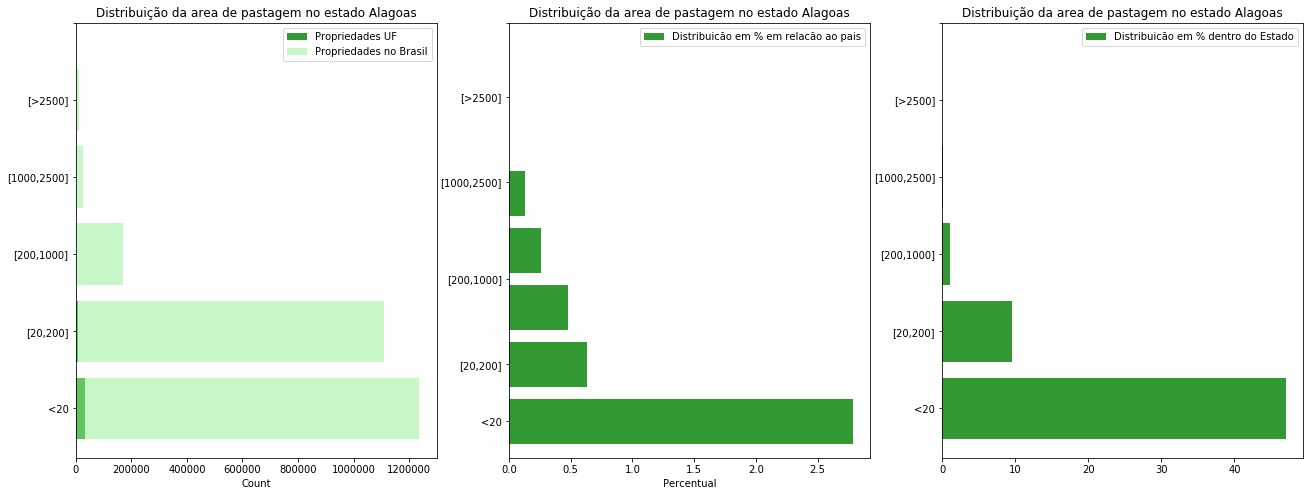

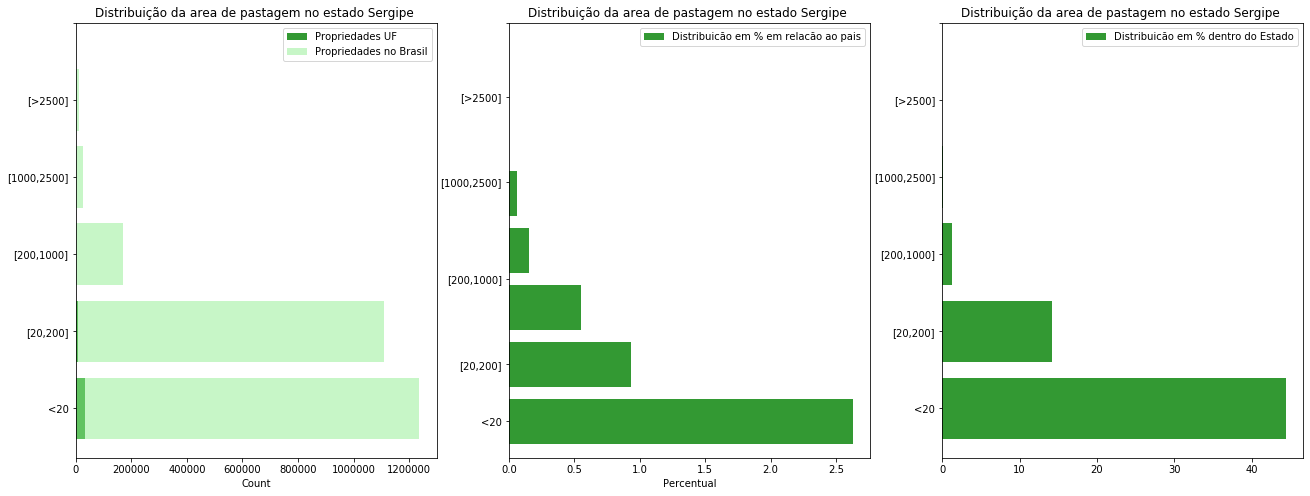

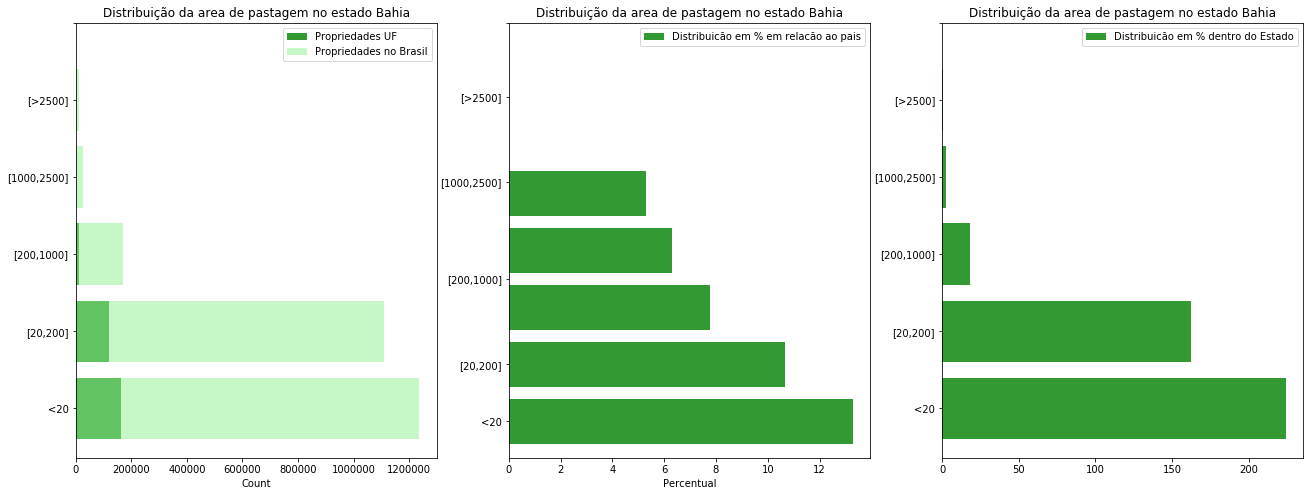

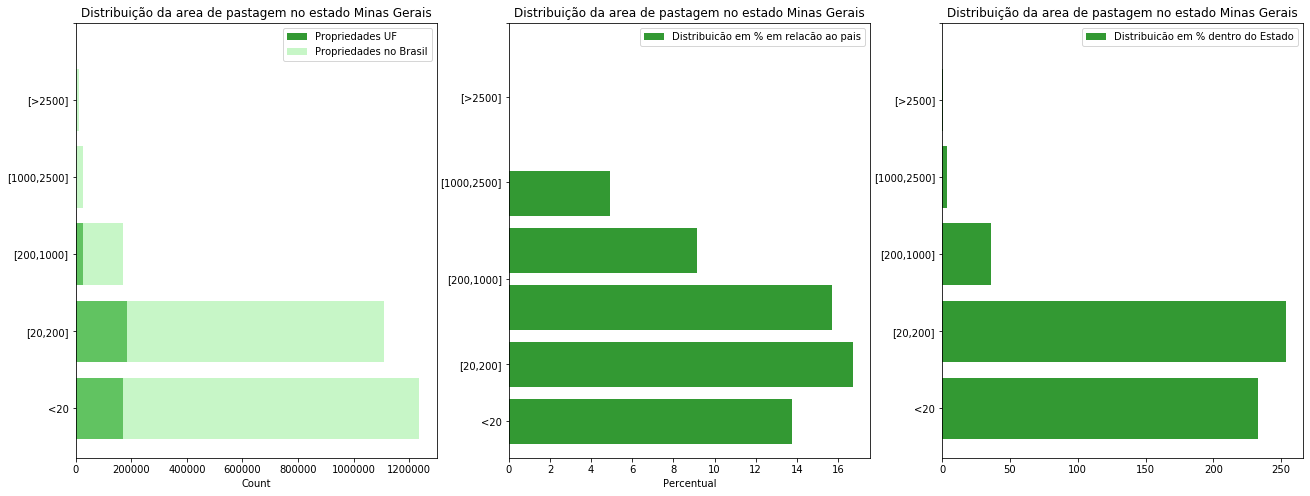

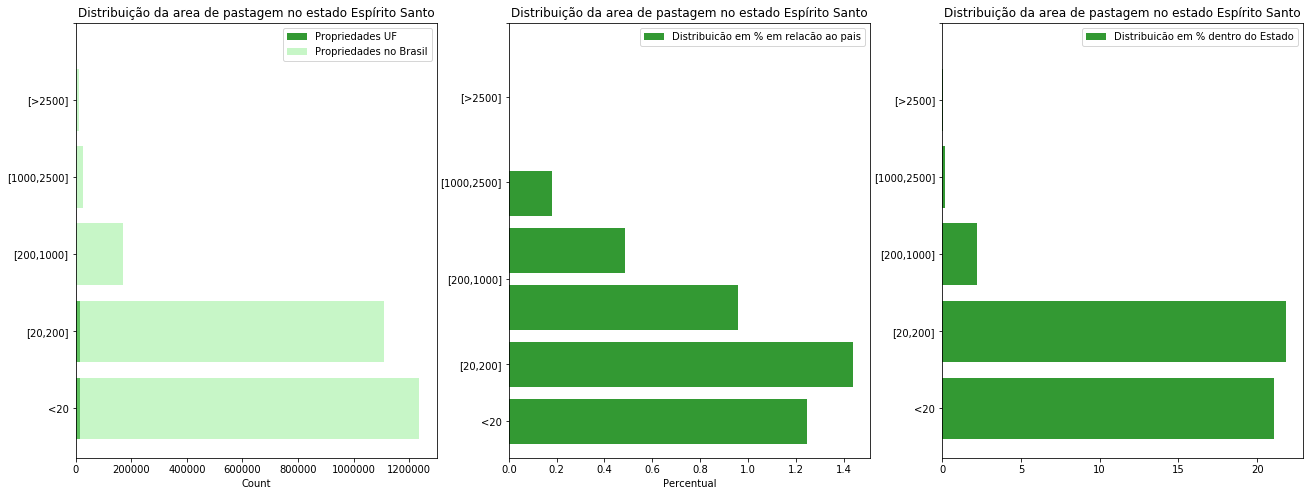

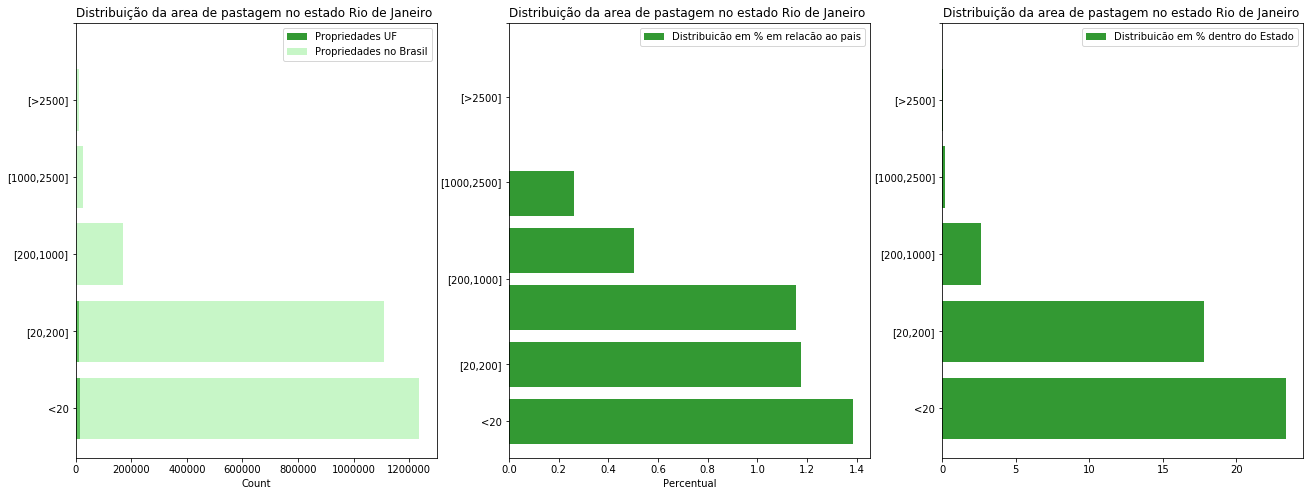

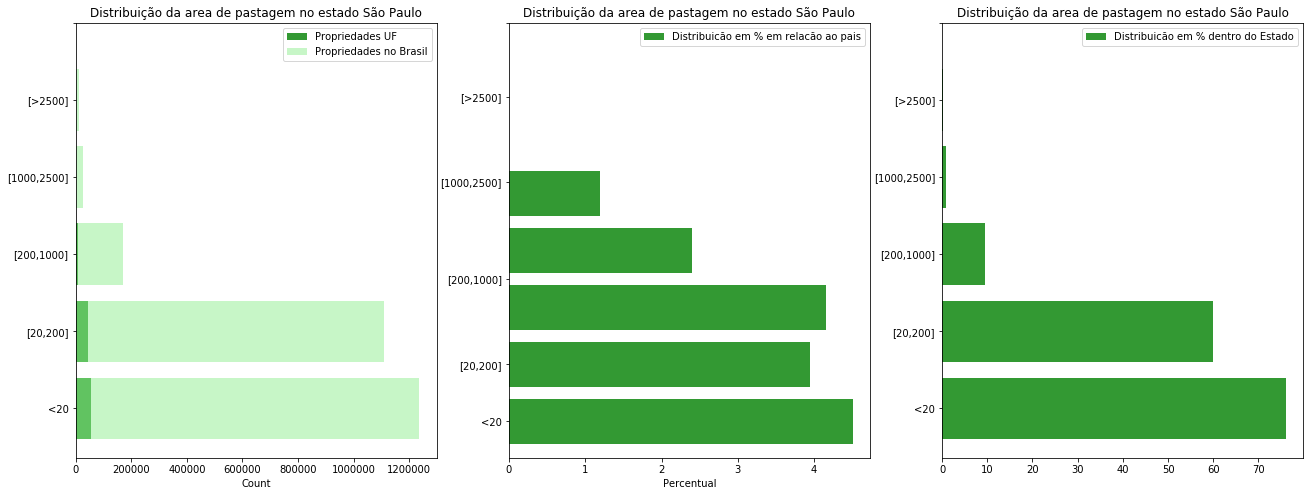

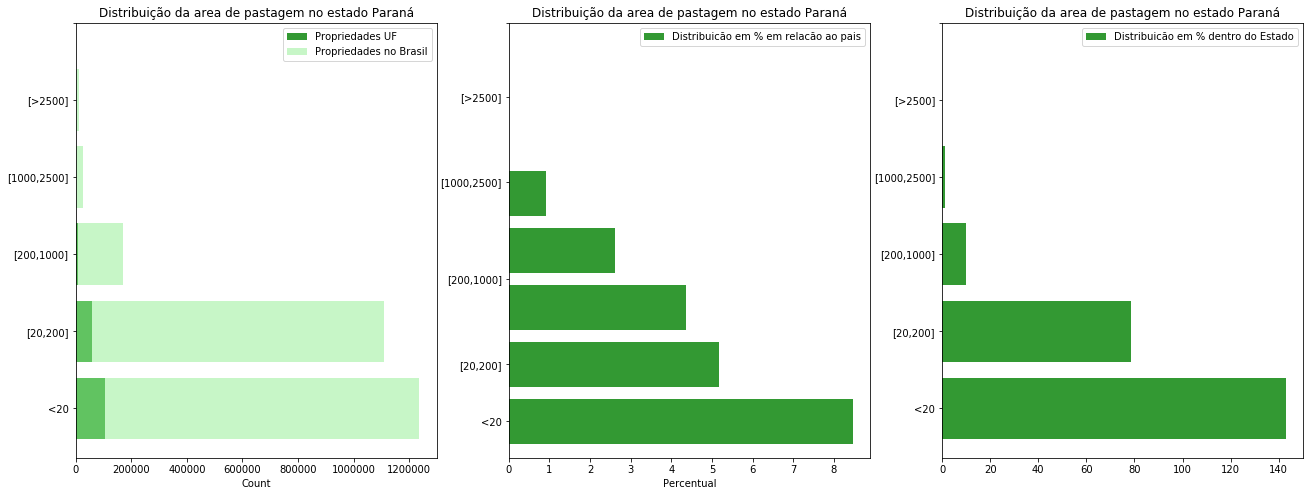

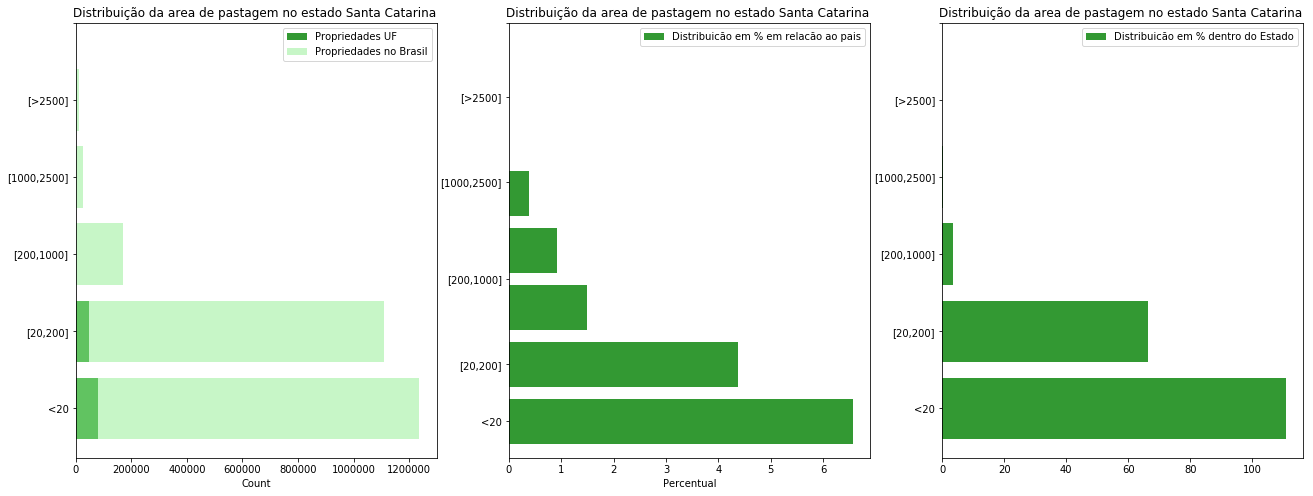

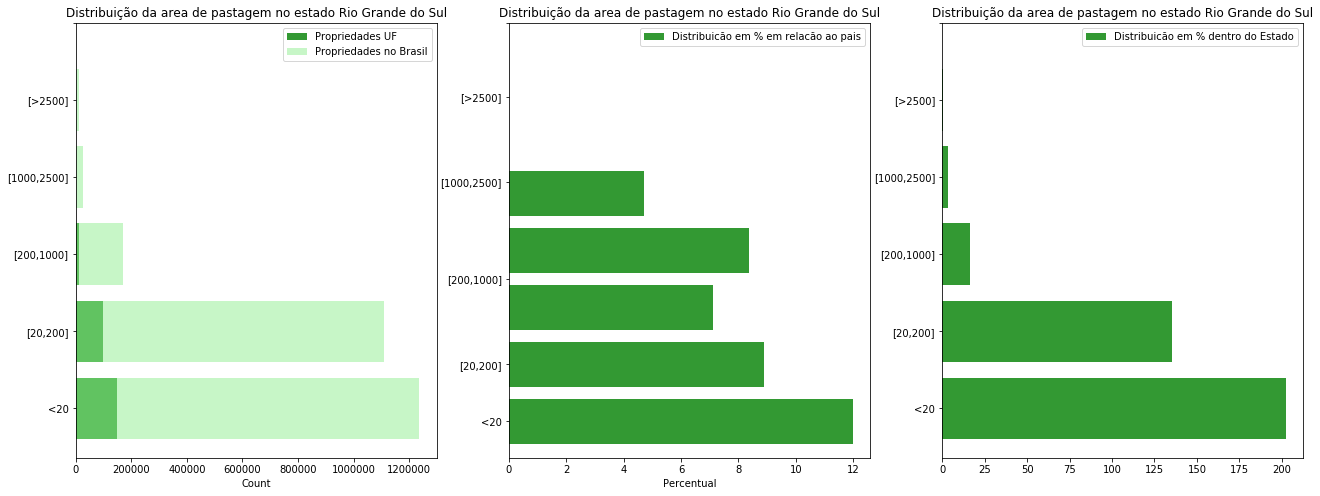

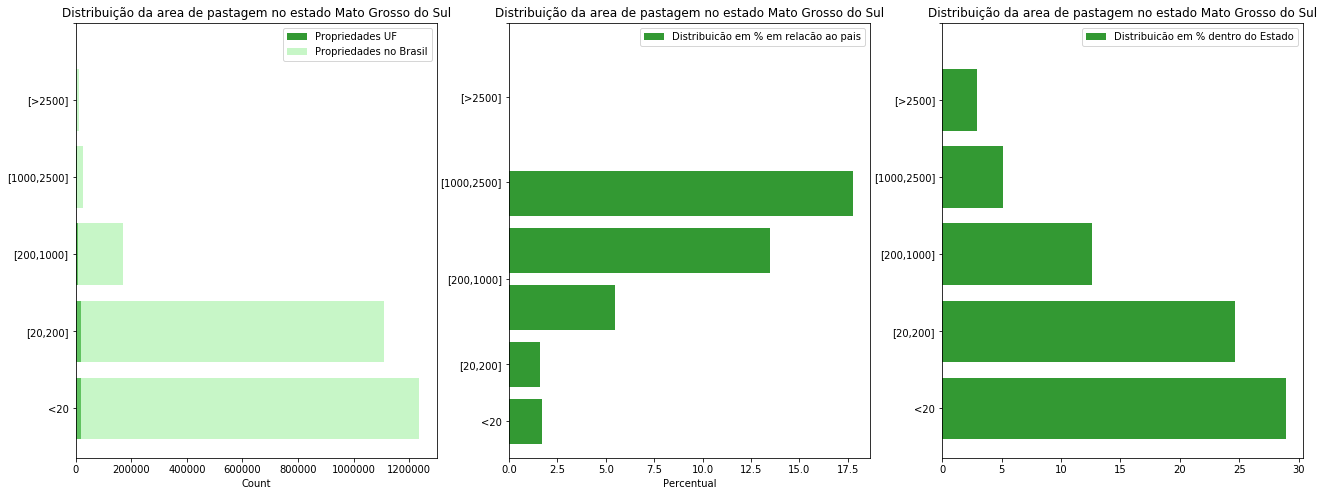

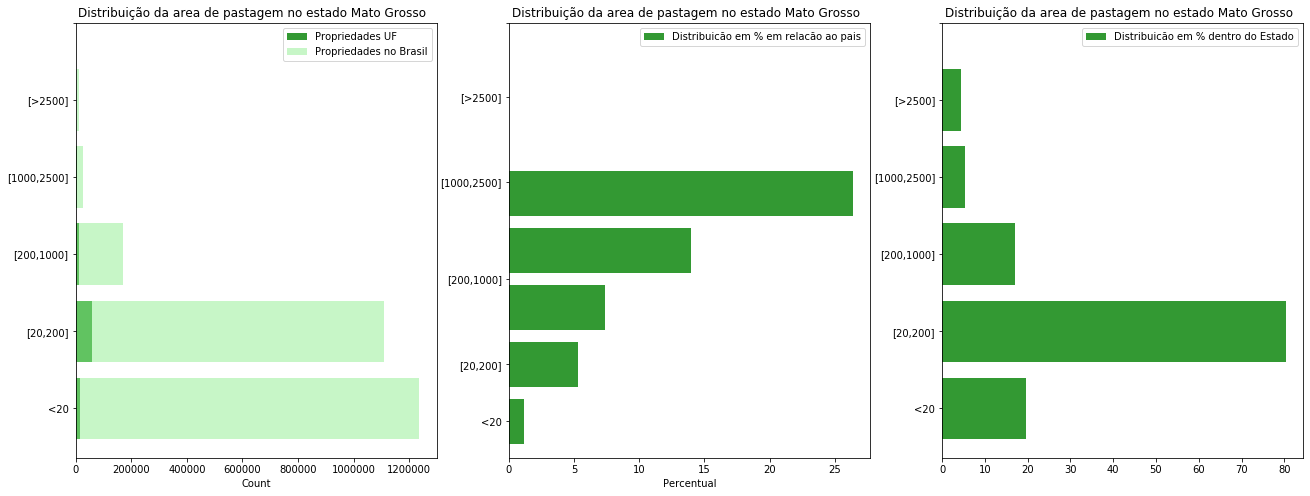

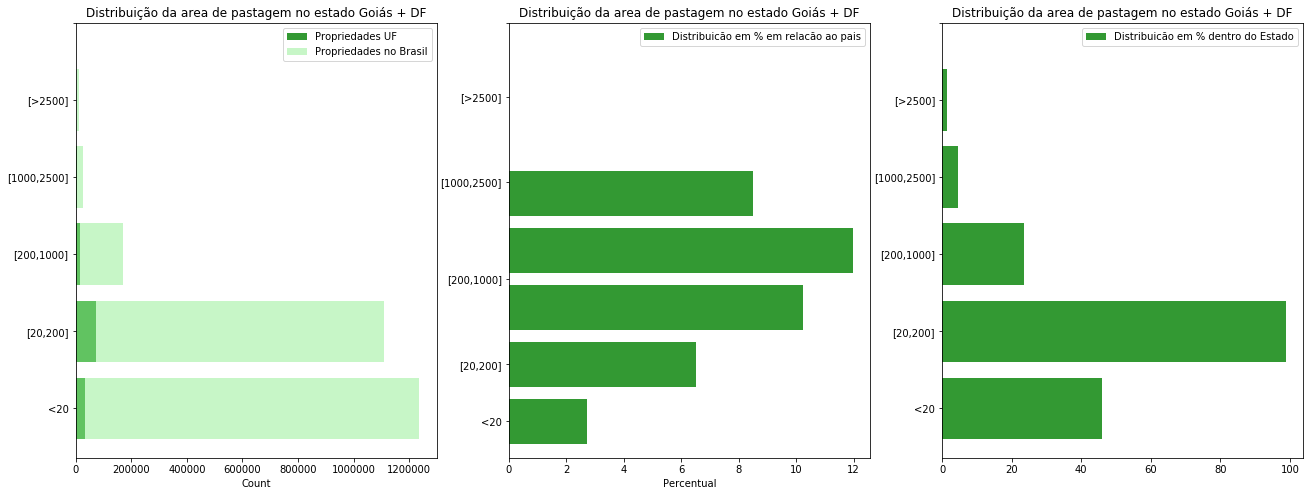

In [81]:
for i in range(1,len(estabelecimento)-1):
    
    intervalos=['Menor que 20','Entre 20 e 200','Entre 200 e 1000','Entre 1000 e 2500','Maior que 2500']    
    quantidade=[estabelecimento['Menor que 20'][i],estabelecimento['Entre 20 e 200'][i],
            estabelecimento['Entre 200 e 1000'][i],estabelecimento['Entre 1000 e 2500'][i],
            estabelecimento['Maior que 2500'][i]]

    
    data1=quantidade
    data2=df['total']

    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(22,8))
   
  
#Distribuição em valores - estado x pais 
    ax1.barh(range(len(data1)),data1,label='Propriedades UF',alpha=0.8,color='green')
    ax1.barh(range(len(data2)),data2,
            label='Propriedades no Brasil',alpha=0.5,color='lightgreen')
    
    plt.sca(ax1)
    plt.yticks([0,1,2,3,4,5],['<20','[20,200]','[200,1000]','[1000,2500]','[>2500]'])
    ax1.set_ylabel('')
    ax1.set_xlabel('Count')
    plt.legend(loc='upper right')
    plt.title('Distribuição da area de pastagem no estado {}'.format(estabelecimento['Unnamed: 0'][i]))

    #Distribuicão em percentual - estado x pais 

    totals=df['total']
    data1_rel=[(i/j)*100 for i,j in zip(data1,totals)]
    ax2.barh(range(len(data1_rel)),data1_rel,alpha=0.8,color='green',label='Distribuicão em % em relacão ao pais')
    plt.sca(ax2)
    plt.legend(loc='upper right')
    plt.title('Distribuição da area de pastagem no estado {}'.format(estabelecimento['Unnamed: 0'][i]))
    
    ax2.set_ylabel('')
    ax2.set_xlabel('Percentual')
    plt.legend(loc='upper right')
    plt.yticks([0,1,2.5,4.2,5.7,7],['<20','[20,200]','[200,1000]',
                          '[1000,2500]','[>2500]'])
    plt.legend(loc='upper right')
   

    totals=estabelecimento['Total'][1]
    data1_rel=[(i/totals)*100 for i in data1]
    ax3.barh(range(len(data1_rel)),data1_rel,alpha=0.8,color='green',label='Distribuicão em % dentro do Estado')
    plt.title('Distribuição da area de pastagem no estado {}'.format(estabelecimento['Unnamed: 0'][i]))
    plt.sca(ax3)
    plt.legend(loc='upper right')
    plt.yticks([0,1,2,3,4,5],['<20','[20,200]','[200,1000]',
                          '[1000,2500]','[>2500]'])


    
    plt.title('Distribuição da area de pastagem no estado {}'.format(estabelecimento['Unnamed: 0'][i]))
    #plt.savefig('Pastagem_{}.jpg'.format(estabelecimento['codigo_uf '][i]),dpi=100,figsize=(22,8))
        


    plt.show()

   

In [ ]:
for i in range(1,len(estabelecimento)-1):
    
    intervalos=['total abate']    
    quantidade=[abate['Total'][i]]

    
    data1=quantidade
    data2=abate['Total'][27]

    f,(ax1)=plt.subplots(1,figsize=(10,4))
   
  
#Distribuição em valores - estado x pais 
    ax1.barh(range(len(data1)),data1,label='Abate bovinos UF',alpha=0.8,color='green')
    ax1.barh(range(0,1),data2,
            label='abate bovinos Brasil',alpha=0.5,color='lightgreen')
    
    plt.sca(ax1)
    x_pos = 0.5
    y_pos = 0.3
    plt.text(x_pos,y_pos,'Percentual: {}'.format((abate['Total'][i]/data2)*100))
    plt.yticks([1],'numero de abates')
    ax1.set_ylabel('')
    ax1.set_xlabel('Count')
    plt.legend(loc='upper right')
    plt.title('Número de abates bovinos em 2018 - {}'.format(estabelecimento['Unnamed: 0'][i]))
    
    #plt.savefig('abate_{}.jpg'.format(estabelecimento['codigo_uf '][i]),dpi=100,figsize=(10,4))
    plt.show()

## Plotando os gráficos de pastagem em cada capital 

In [70]:
capital

,capital,lat,long,codigo uf,lat1,long1
0,Aracaju,-10.909100,-37.0677,28,-10.13480,-36.9350
1,Belém,-1.455400,-48.4898,15,-1.72183,-48.8788
2,Belo Horizonte,-19.910200,-43.9266,31,-18.48310,-47.3916
3,Boa Vista,2.823840,-60.6753,14,2.98858,-61.3072
4,Brasília,-15.779500,-47.9297,53,-16.75730,-49.4412
5,Campo Grande,-20.448600,-54.6295,50,-20.44520,-52.8790
6,Cuiabá,-15.601000,-56.0974,51,-15.19400,-56.3632
7,Curitiba,-25.419500,-49.2646,41,-23.30490,-50.3133
8,Florianópolis,-27.594500,-48.5477,42,-27.61260,-51.0233
9,Fortaleza,-3.716640,-38.5423,23,-7.34588,-39.0416


In [85]:
icon_image=r'/Users/usuario02/Downloads/visualizacao/cow-icon.jpg'


In [82]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=6,tiles = "CartoDB dark_matter")

for i in range(0,len(capital)): 
    
    popup1='<\b> Abate em 2018:{} </b> '.format(abate['Total'][i])
    popup2='{}%'.format(abate['Percentual '][i])     
    icon = CustomIcon(icon_image,icon_size=(20,20))
    marker = folium.Marker(location=[capital['lat1'][i],capital['long1'][i]], popup=[popup1,popup2],icon=icon)
    marker.add_to(mapa)



In [92]:
icon_image=r'/Users/usuario02/Downloads/visualizacao/cow-icon.jpg'

In [119]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=6,tiles = "CartoDB dark_matter")

folium.GeoJson(geo_json_data).add_to(mapa)

for i in range(0,len(capital)): 
    encoded = base64.b64encode(open('abate_{}.jpg'.format(capital['codigo uf'][i]),'rb').read())
    html = '<img src="data:image/png;base64,{}">'.format
    resolution, width, height = 75, 12, 7
    iframe = IFrame(html(encoded.decode('UTF-8')), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = CustomIcon(icon_image,icon_size=(45,45))
    marker = folium.Marker(location=[capital['lat1'][i],capital['long1'][i]], popup=popup,icon=icon)
    marker.add_to(mapa)

In [120]:
icon_image2=r'/Users/usuario02/Downloads/cowboy.png'
icon=CustomIcon(icon_image,icon_size=(60,60))

In [121]:
for i in range(0,len(capital)): 
    encoded = base64.b64encode(open('Pastagem_{}.jpg'.format(capital['codigo uf'][i]),'rb').read())
    html = '<img src="data:image/png;base64,{}">'.format
    resolution, width, height = 75, 30, 10
    iframe = IFrame(html(encoded.decode('UTF-8')), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = CustomIcon(icon_image2,icon_size=(45,45))
    marker = folium.Marker(location=[capital['lat'][i],capital['long'][i]], popup=popup,icon=icon)
    marker.add_to(mapa)

mapa.save('agro_abate3.html')    


## Primeiros testes na construção do mapa...          

### Construção com marcadores de tamanhos iguais e cores diferentes 

In [114]:
#mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=6,tiles = "CartoDB dark_matter")

folium.GeoJson(geo_json_data).add_to(mapa)

tooltip='Número de propriedades'
#cores 
c1='darkgreen'
c2='green'
c3='lightgreen'
c4='lightyellow'
c5='white'
f1=0.9
#raios
r1=2
r2=2
r3=2
r4=2
r5=2

#RO 

for lat,long in zip(municipios_RO['lat'][0:11],municipios_RO['long'][0:11]):
    folium.CircleMarker(location=[lat,long], radius=r1,
                        poup='<b>propriedade<b>',
                        fill_color='green',color='green',fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RO['lat'][12:45],municipios_RO['long'][12:45]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup=estabelecimento['Menor que 20'][0],fill_color='lightgreen',color='lightgreen',fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RO['lat'][46:50],municipios_RO['long'][46:50]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color='lightgreen',color='lightgreen',fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_RO['lat'][25:26],municipios_RO['long'][25:26]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='white',color='white',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_RO['lat'][27:28],municipios_RO['long'][27:28]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='orange',color='orange',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)


#AC 
    
for lat,long in zip(municipios_AC['lat'][0:8],municipios_AC['long'][0:8]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AC['lat'][9:30],municipios_AC['long'][9:30]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AC['lat'][10:14],municipios_AC['long'][10:14]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_AC['lat'][25:26],municipios_RO['long'][25:26]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='white',color='white',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_AC['lat'][27:28],municipios_RO['long'][27:28]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='orange',color='orange',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)


#AM 

for lat,long in zip(municipios_AM['lat'][0:12],municipios_AM['long'][0:12]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AM['lat'][13:43],municipios_AM['long'][13:43]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AM['lat'][43:49],municipios_AM['long'][43:49]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#RR    
    
for lat,long in zip(municipios_RR['lat'][0:6],municipios_RR['long'][0:6]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RR['lat'][7:37],municipios_RR['long'][7:37]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RR['lat'][6:8],municipios_RR['long'][6:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
        
#PA

for lat,long in zip(municipios_PA['lat'][0:5],municipios_PA['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PA['lat'][6:41],municipios_PA['long'][6:41]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PA['lat'][42:47],municipios_PA['long'][42:47]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
for lat,long in zip(municipios_PA['lat'][48:49],municipios_PA['long'][48:49]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
        
#AP 

for lat,long in zip(municipios_AP['lat'][0:6],municipios_AP['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AP['lat'][6:36],municipios_AP['long'][6:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AP['lat'][0:10],municipios_AP['long'][1:11]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            
for lat,long in zip(municipios_AP['lat'][0:1],municipios_AP['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            

#TO

for lat,long in zip(municipios_TO['lat'][0:5],municipios_TO['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_TO['lat'][6:39],municipios_TO['long'][6:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_TO['lat'][39:47],municipios_TO['long'][39:47]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            
for lat,long in zip(municipios_TO['lat'][0:1],municipios_TO['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            

    
#Regiao Nordeste     
    
#MA 

for lat,long in zip(municipios_MA['lat'][0:18],municipios_MA['long'][0:18]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MA['lat'][0:26],municipios_MA['long'][1:27]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MA['lat'][0:4],municipios_MA['long'][1:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            

#PI    
    
for lat,long in zip(municipios_PI['lat'][0:22],municipios_PI['long'][0:22]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PI['lat'][0:23],municipios_PI['long'][1:24]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PI['lat'][0:2],municipios_PI['long'][1:3]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        

    
#CE

for lat,long in zip(municipios_CE['lat'][0:31],municipios_CE['long'][0:31]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_CE['lat'][0:16],municipios_CE['long'][1:17]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_CE['lat'][0:1],municipios_CE['long'][3:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        

    
#RN
    
for lat,long in zip(municipios_RN['lat'][0:29],municipios_RN['long'][0:29]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RN['lat'][0:17],municipios_RN['long'][1:18]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RN['lat'][0:2],municipios_RN['long'][3:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
    
#PB    

for lat,long in zip(municipios_PB['lat'][0:36],municipios_PB['long'][0:36]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PB['lat'][0:12],municipios_PB['long'][1:13]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PB['lat'][0:1],municipios_PB['long'][3:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                
    
#PE 


for lat,long in zip(municipios_PE['lat'][0:37],municipios_PE['long'][0:37]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PE['lat'][0:11],municipios_PE['long'][1:12]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
#AL 

for lat,long in zip(municipios_AL['lat'][0:40],municipios_AL['long'][0:40]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AL['lat'][0:8],municipios_AL['long'][1:9]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
#SE    

for lat,long in zip(municipios_SE['lat'][0:37],municipios_SE['long'][0:37]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SE['lat'][0:11],municipios_SE['long'][1:12]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_SE['lat'][0:1],municipios_SE['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#BA    
    
for lat,long in zip(municipios_BA['lat'][0:27],municipios_BA['long'][0:27]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_BA['lat'][0:19],municipios_BA['long'][1:19]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_BA['lat'][0:2],municipios_BA['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
    
#SUDESTE 

#MG

for lat,long in zip(municipios_MG['lat'][0:22],municipios_MG['long'][0:22]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MG['lat'][22:46],municipios_MG['long'][22:46]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MG['lat'][0:2],municipios_MG['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#ES 

for lat,long in zip(municipios_ES['lat'][0:23],municipios_ES['long'][0:23]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_ES['lat'][22:46],municipios_ES['long'][22:46]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_ES['lat'][0:2],municipios_ES['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#RJ    
    
for lat,long in zip(municipios_RJ['lat'][0:26],municipios_RJ['long'][0:26]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RJ['lat'][27:47],municipios_ES['long'][27:47]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_RJ['lat'][0:3],municipios_RJ['long'][2:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
        
    
#SP 

for lat,long in zip(municipios_SP['lat'][0:25],municipios_SP['long'][0:25]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SP['lat'][27:47],municipios_SP['long'][27:47]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_SP['lat'][0:3],municipios_SP['long'][2:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
        
    
    
#REGIAO SUL 

#PR 


for lat,long in zip(municipios_PR['lat'][0:30],municipios_PR['long'][0:30]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PR['lat'][0:16],municipios_PR['long'][1:17]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_PR['lat'][0:2],municipios_PR['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#SC    
    
for lat,long in zip(municipios_SC['lat'][0:30],municipios_SC['long'][0:30]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SC['lat'][0:18],municipios_SC['long'][1:19]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
#RS
    

for lat,long in zip(municipios_RS['lat'][0:28],municipios_RS['long'][0:28]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RS['lat'][0:18],municipios_RS['long'][1:18]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_RS['lat'][0:2],municipios_RS['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
    
    
#Centro-Oeste 

#MS 

        

#MT         
        
for lat,long in zip(municipios_MT['lat'][0:7],municipios_MT['long'][0:7]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MT['lat'][8:39],municipios_MT['long'][8:39]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MT['lat'][0:6],municipios_MT['long'][2:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_MT['lat'][0:2],municipios_MT['long'][10:12]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
        
for lat,long in zip(municipios_MT['lat'][0:1],municipios_MT['long'][10:11]):
    folium.CircleMarker(location=[lat,long], radius=r5,poup='<b>Propriedade <b>',fill_color=c5,color=c5,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                           
        

#GO +DF 

for lat,long in zip(municipios_GO_DF['lat'][0:13],municipios_GO_DF['long'][0:13]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_GO_DF['lat'][14:52],municipios_GO_DF['long'][14:52]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_GO_DF['lat'][0:6],municipios_GO_DF['long'][2:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_GO_DF['lat'][0:1],municipios_GO_DF['long'][10:11]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
            
    
for lat,long in zip(municipios_MS['lat'][0:19],municipios_MS['long'][0:19]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MS['lat'][20:36],municipios_MS['long'][20:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MS['lat'][40:48],municipios_MS['long'][40:48]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_MS['lat'][50:53],municipios_MS['long'][50:53]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
        
for lat,long in zip(municipios_MS['lat'][100:101],municipios_MS['long'][100:101]):
    folium.CircleMarker(location=[lat,long], radius=r5,poup='<b>Propriedade <b>',fill_color=c5,color=c5,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                           

mapa.save('versao2.html')        

### Com cores iguais e tamanhos diferentes 

In [106]:
#mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=6,tiles = "CartoDB dark_matter")

folium.GeoJson(geo_json_data).add_to(mapa)

tooltip='Número de propriedades'
c1='lightgreen'
c2='lightgreen'
c3='lightgreen'
c4='lightgreen'
c5='lightgreen'
f1=0
r1=2
r2=4
r3=6
r4=8
r5=10

#RO 

for lat,long in zip(municipios_RO['lat'][0:11],municipios_RO['long'][0:11]):
    folium.CircleMarker(location=[lat,long], radius=r1,
                        poup='<b>propriedade<b>',
                        fill_color='green',color='green',fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RO['lat'][12:45],municipios_RO['long'][12:45]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup=estabelecimento['Menor que 20'][0],fill_color='lightgreen',color='lightgreen',fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RO['lat'][46:50],municipios_RO['long'][46:50]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color='lightgreen',color='lightgreen',fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_RO['lat'][25:26],municipios_RO['long'][25:26]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='white',color='white',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_RO['lat'][27:28],municipios_RO['long'][27:28]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='orange',color='orange',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)


#AC 
    
for lat,long in zip(municipios_AC['lat'][0:8],municipios_AC['long'][0:8]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AC['lat'][9:30],municipios_AC['long'][9:30]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AC['lat'][10:14],municipios_AC['long'][10:14]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_AC['lat'][25:26],municipios_RO['long'][25:26]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='white',color='white',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)

#for lat,long in zip(municipios_AC['lat'][27:28],municipios_RO['long'][27:28]):
    #folium.CircleMarker(location=[lat,long], radius=2,poup='<b>Propriedade <b>',fill_color='orange',color='orange',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)


#AM 

for lat,long in zip(municipios_AM['lat'][0:12],municipios_AM['long'][0:12]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AM['lat'][13:43],municipios_AM['long'][13:43]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AM['lat'][43:49],municipios_AM['long'][43:49]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)

#RR    
    
for lat,long in zip(municipios_RR['lat'][0:6],municipios_RR['long'][0:6]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RR['lat'][7:37],municipios_RR['long'][7:37]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RR['lat'][6:8],municipios_RR['long'][6:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
        
#PA

for lat,long in zip(municipios_PA['lat'][0:5],municipios_PA['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PA['lat'][6:41],municipios_PA['long'][6:41]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PA['lat'][42:47],municipios_PA['long'][42:47]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
for lat,long in zip(municipios_PA['lat'][48:49],municipios_PA['long'][48:49]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
        
#AP 

for lat,long in zip(municipios_AP['lat'][0:6],municipios_AP['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AP['lat'][6:36],municipios_AP['long'][6:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AP['lat'][0:10],municipios_AP['long'][1:11]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            
for lat,long in zip(municipios_AP['lat'][0:1],municipios_AP['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            

#TO

for lat,long in zip(municipios_TO['lat'][0:5],municipios_TO['long'][0:5]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_TO['lat'][6:39],municipios_TO['long'][6:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_TO['lat'][39:47],municipios_TO['long'][39:47]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            
for lat,long in zip(municipios_TO['lat'][0:1],municipios_TO['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            

    
#Regiao Nordeste     
    
#MA 

for lat,long in zip(municipios_MA['lat'][0:18],municipios_MA['long'][0:18]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MA['lat'][0:26],municipios_MA['long'][1:27]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MA['lat'][0:4],municipios_MA['long'][1:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
            

#PI    
    
for lat,long in zip(municipios_PI['lat'][0:22],municipios_PI['long'][0:22]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PI['lat'][0:23],municipios_PI['long'][1:24]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PI['lat'][0:2],municipios_PI['long'][1:3]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        

    
#CE

for lat,long in zip(municipios_CE['lat'][0:31],municipios_CE['long'][0:31]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_CE['lat'][0:16],municipios_CE['long'][1:17]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_CE['lat'][0:1],municipios_CE['long'][3:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        

    
#RN
    
for lat,long in zip(municipios_RN['lat'][0:29],municipios_RN['long'][0:29]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RN['lat'][0:17],municipios_RN['long'][1:18]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RN['lat'][0:2],municipios_RN['long'][3:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
    
#PB    

for lat,long in zip(municipios_PB['lat'][0:36],municipios_PB['long'][0:36]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PB['lat'][0:12],municipios_PB['long'][1:13]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PB['lat'][0:1],municipios_PB['long'][3:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                
    
#PE 


for lat,long in zip(municipios_PE['lat'][0:37],municipios_PE['long'][0:37]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PE['lat'][0:11],municipios_PE['long'][1:12]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
#AL 

for lat,long in zip(municipios_AL['lat'][0:40],municipios_AL['long'][0:40]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_AL['lat'][0:8],municipios_AL['long'][1:9]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
#SE    

for lat,long in zip(municipios_SE['lat'][0:37],municipios_SE['long'][0:37]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SE['lat'][0:11],municipios_SE['long'][1:12]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_SE['lat'][0:1],municipios_SE['long'][1:2]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#BA    
    
for lat,long in zip(municipios_BA['lat'][0:27],municipios_BA['long'][0:27]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_BA['lat'][0:19],municipios_BA['long'][1:19]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_BA['lat'][0:2],municipios_BA['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
    
#SUDESTE 

#MG

for lat,long in zip(municipios_MG['lat'][0:22],municipios_MG['long'][0:22]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MG['lat'][22:46],municipios_MG['long'][22:46]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MG['lat'][0:2],municipios_MG['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#ES 

for lat,long in zip(municipios_ES['lat'][0:23],municipios_ES['long'][0:23]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_ES['lat'][22:46],municipios_ES['long'][22:46]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_ES['lat'][0:2],municipios_ES['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#RJ    
    
for lat,long in zip(municipios_RJ['lat'][0:26],municipios_RJ['long'][0:26]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RJ['lat'][27:47],municipios_ES['long'][27:47]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_RJ['lat'][0:3],municipios_RJ['long'][2:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
        
    
#SP 

for lat,long in zip(municipios_SP['lat'][0:25],municipios_SP['long'][0:25]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SP['lat'][27:47],municipios_SP['long'][27:47]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_SP['lat'][0:3],municipios_SP['long'][2:5]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
        
    
    
#REGIAO SUL 

#PR 


for lat,long in zip(municipios_PR['lat'][0:30],municipios_PR['long'][0:30]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_PR['lat'][0:16],municipios_PR['long'][1:17]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_PR['lat'][0:2],municipios_PR['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)        
    
#SC    
    
for lat,long in zip(municipios_SC['lat'][0:30],municipios_SC['long'][0:30]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_SC['lat'][0:18],municipios_SC['long'][1:19]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
#RS
    

for lat,long in zip(municipios_RS['lat'][0:28],municipios_RS['long'][0:28]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_RS['lat'][0:18],municipios_RS['long'][1:18]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_RS['lat'][0:2],municipios_RS['long'][2:4]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
    
    
#Centro-Oeste 

#MS 

        

#MT         
        
for lat,long in zip(municipios_MT['lat'][0:7],municipios_MT['long'][0:7]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MT['lat'][8:39],municipios_MT['long'][8:39]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MT['lat'][0:6],municipios_MT['long'][2:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_MT['lat'][0:2],municipios_MT['long'][10:12]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
        
for lat,long in zip(municipios_MT['lat'][0:1],municipios_MT['long'][10:11]):
    folium.CircleMarker(location=[lat,long], radius=r5,poup='<b>Propriedade <b>',fill_color=c5,color=c5,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                           
        

#GO +DF 

for lat,long in zip(municipios_GO_DF['lat'][0:13],municipios_GO_DF['long'][0:13]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_GO_DF['lat'][14:52],municipios_GO_DF['long'][14:52]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_GO_DF['lat'][0:6],municipios_GO_DF['long'][2:8]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_GO_DF['lat'][0:1],municipios_GO_DF['long'][10:11]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
            
    
for lat,long in zip(municipios_MS['lat'][0:19],municipios_MS['long'][0:19]):
    folium.CircleMarker(location=[lat,long], radius=r1,poup='<b>Propriedade <b>',fill_color=c1,color=c1,fill_opacity=f1,tooltip=tooltip).add_to(mapa)
    
for lat,long in zip(municipios_MS['lat'][20:36],municipios_MS['long'][20:36]):
    folium.CircleMarker(location=[lat,long], radius=r2,poup='<b>Propriedade <b>',fill_color=c2,color=c2,fill_opacity=f1,tooltip=tooltip).add_to(mapa)    
    
    
for lat,long in zip(municipios_MS['lat'][40:48],municipios_MS['long'][40:48]):
    folium.CircleMarker(location=[lat,long], radius=r3,poup='<b>Propriedade <b>',fill_color=c3,color=c3,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
        

for lat,long in zip(municipios_MS['lat'][50:53],municipios_MS['long'][50:53]):
    folium.CircleMarker(location=[lat,long], radius=r4,poup='<b>Propriedade <b>',fill_color=c4,color=c4,fill_opacity=f1,tooltip=tooltip).add_to(mapa)            
                
        
for lat,long in zip(municipios_MS['lat'][100:101],municipios_MS['long'][100:101]):
    folium.CircleMarker(location=[lat,long], radius=r5,poup='<b>Propriedade <b>',fill_color=c5,color=c5,fill_opacity=f1,tooltip=tooltip).add_to(mapa)                           

        
mapa.save('versao1.html')



## Primeiros testes... 

### Construção do mapa com marcadores iguais 

In [142]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=6,tiles = "CartoDB dark_matter")

marker_cluster = MarkerCluster().add_to(mapa)
#frigorifico minerva em Goias com a cor vermelha;

folium.CircleMarker(location=[-16.801037400000,-49.930901900000], radius = 9, popup='<b>Minerva Palmeiras de Goias <b>', fill_color='red', color="red", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-15.321205650592 ,-49.131267801894], radius = 9, popup='<b>Miverva Goianesia <b>', fill_color='red', color="red", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-15.803151000000,-47.954985000000], radius = 9, popup='<b>Minerva DF <b>', fill_color='red', color="red", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-16.776325401552 ,-49.243559704597], radius = 9, popup='<b>Minerva Aparecida de Goias <b>', fill_color='red', color="red", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)

#frigorifico Friboi em Goias com a cor amarela; 

folium.CircleMarker(location=[-16.6363133, -49.3310051], radius = 9, popup='<b>Friboi - Goiânia <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-14.7559349, -50.5453169], radius = 9, popup='<b>Friboi - Mozarlândia <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-16.707850, -50.5453169], radius = 9, popup='<b>Friboi - Senador Canedo <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-18.400190, -49.203380], radius = 9, popup='<b>Friboi - Itumbiara <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-16.523900, -50.372510], radius = 9, popup='<b>Friboi - São Luis dos Montes Belos <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-16.6363133, -49.3310051], radius = 9, popup='<b>Friboi - Rio Verde <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-16.327400, -48.953320], radius = 9, popup='<b>Friboi - Anapolis <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9,tooltip=tooltip).add_to(mapa)

folium.Marker([-16.6363133, -49.3310051],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Goiânia</b>').add_to(mapa)
folium.Marker([-14.7559349, -50.5453169],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Mozarlândia </b>').add_to(mapa)
folium.Marker([-16.707850, -50.5453169],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Senador Canedo</b>').add_to(mapa)
folium.Marker([-18.400190, -49.203380],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Itumbiara</b>').add_to(mapa)
folium.Marker([-16.523900, -50.372510],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - São Luis dos Montes Belos </b>').add_to(mapa)
folium.Marker([-16.6363133, -49.3310051],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Rio Verde </b>').add_to(mapa)
folium.Marker([-16.327400, -48.953320],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Anapolis </b>').add_to(mapa)

#Fazendas 

folium.CircleMarker(location=[-16.197,-48.7057], radius = 9, popup='<b>Fazenda 1 <b>', fill_color='green', color="green", fill_opacity = 0.9,tooltip=tooltip).add_to(marker_cluster)
folium.CircleMarker(location=[-28.1149,-52.9142], radius = 9, popup='<b>Fazenda 2 <b>', fill_color='green', color="green", fill_opacity = 0.9,tooltip=tooltip).add_to(marker_cluster)
folium.CircleMarker(location=[-20.5242,-49.0571], radius = 9, popup='<b>Fazenda 3<b>', fill_color='green', color="green", fill_opacity = 0.9,tooltip=tooltip).add_to(marker_cluster)
folium.CircleMarker(location=[-11.6732,-51.3883], radius = 9, popup='<b>Fazenda<b>', fill_color='green', color="green", fill_opacity = 0.9,tooltip=tooltip).add_to(marker_cluster)
folium.CircleMarker(location=[-12.4785,-49.1249], radius = 9, popup='<b>Fazenda <b>', fill_color='green', color="green", fill_opacity = 0.9,tooltip=tooltip).add_to(marker_cluster)
#folium.CircleMarker(location=[-16.6363133, -49.3310051], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.327400, -48.953320], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.6363133, -49.3310051], radius = 9, popup='<b>Fazenda<b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-14.7559349, -50.5453169], radius = 9, popup='<b>Fazenda<b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.707850, -50.5453169], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-18.400190, -49.203380], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.523900, -50.372510], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.6363133, -49.3310051], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)
#folium.CircleMarker(location=[-16.327400, -48.953320], radius = 9, popup='<b>Fazenda <b>', fill_color='yellow', color="yellow", fill_opacity = 0.9).add_to(mapa)


### Construção com marcadores diferentes 

In [143]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=7,tiles = "CartoDB dark_matter")

icon_image=r'/Users/usuario02/Downloads/visualizacao/cow-icon.jpg'
icon1 = CustomIcon(
icon_image,
icon_size=(40, 40),
icon_anchor=(22, 94)
)

#frigorifico minerva
folium.Marker([-16.801037400000,-49.930901900000],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Minerva Foods -Palmeiras de Goias</b>').add_to(mapa)
folium.Marker([-15.321205650592 ,-49.131267801894],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Minerva Foods-Goianésia</b>').add_to(mapa)
folium.Marker([-15.803151000000,-47.954985000000],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Minerva Foods-DF</b>').add_to(mapa)
folium.Marker([-16.776325401552 ,-49.243559704597],tooltip='fazenda',icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Minerva Foods-Aparecida de Goiás</b>').add_to(mapa)

#frigorifico jbs 

folium.Marker([-16.6363133, -49.3310051],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Goiânia</b>').add_to(mapa)
folium.Marker([-14.7559349, -50.5453169],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Mozarlândia </b>').add_to(mapa)
folium.Marker([-16.707850, -50.5453169],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Senador Canedo</b>').add_to(mapa)
folium.Marker([-18.400190, -49.203380],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Itumbiara</b>').add_to(mapa)
folium.Marker([-16.523900, -50.372510],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - São Luis dos Montes Belos </b>').add_to(mapa)
folium.Marker([-16.6363133, -49.3310051],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Rio Verde </b>').add_to(mapa)
folium.Marker([-16.327400, -48.953320],icon=CustomIcon(icon_image,icon_size=(40,40)),popup='<b>Friboi - Anapolis </b>').add_to(mapa)

folium.CircleMarker(location=[-16.197,-48.7057], radius = 9, popup='<b>Fazenda 1 <b>', fill_color='green', color="green", fill_opacity = 0.5,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-28.1149,-52.9142], radius = 5, popup='<b>Fazenda 2 <b>', fill_color='green', color="green", fill_opacity = 0.5,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-20.5242,-49.0571], radius = 12, popup='<b>Fazenda 3<b>', fill_color='green', color="green", fill_opacity = 0.5,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-11.6732,-51.3883], radius = 20, popup='<b>Fazenda<b>', fill_color='green', color="green", fill_opacity = 0.5,tooltip=tooltip).add_to(mapa)
folium.CircleMarker(location=[-12.4785,-49.1249], radius = 2, popup='<b>Fazenda <b>', fill_color='green', color="green", fill_opacity = 0.5,tooltip=tooltip).add_to(mapa)


#folium.Marker([-19.9166813,-43.9344931]).add_to(mapa)
#tooltip = 'Click me!'
#folium.Marker([-16.6786100,-49.2538900]).add_to(mapa)
#folium.Marker([-16.495000,-49.524600],popup='<b>Preço: R$ 20k; Extesão: 10 ha</b>', tooltip=tooltip).add_to(mapa)
#folium.Marker([-16.6786100,-49.524600]).add_to(mapa)
#folium.Marker([-16.495000,-49.2538900]).add_to(mapa)
#folium.Marker([-16.7895,-49.5533]).add_to(mapa)

#Plotar propriedades <20 - cor verde 


for lat,long in zip(latitude,longitude):
    folium.CircleMarker(location=[lat,long], radius=5,poup='<b>Propriedade <b>',fill_color='green',color='green',fill_opacity=0.9,tooltip=tooltip).add_to(mapa)

